# Procesamiento del lenguje natural

### Imporando Librerias

In [0]:
import pandas as pd
import numpy as np

### Cargando *Dataset*

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ds1.zip to ds1.zip


In [0]:
import io
import json
from zipfile import ZipFile
lista = []

with ZipFile(io.BytesIO(uploaded['ds1.zip']), 'r') as zipObj:
   # Get a list of all archived file names from the zip
   listOfFileNames = zipObj.namelist()
   # Iterate over the file names
   for fileName in listOfFileNames:
     # Check filename endswith csv
     #print(fileName)
     if fileName.endswith('.json'):
       with zipObj.open(fileName) as file_text:
         #zipObj.extract(fileName, 'temp_csv')
         d = file_text.read()
         d = json.loads(d)
         #print(d['text'])
         lista.append(d['text'])  
         # Extract a single file from zip

In [0]:
df = pd.DataFrame(lista,columns=['News'])

In [5]:
print(df['News'][0])

Garantía 12 meses (1 año) Comentarios del anunciante 
Vehiculo en buen estado, mantenimientos al dia, libro de revisiones, motor 3.0 Di 154 cv, 7 plazas, lunas tintadas, bola de remolque, estribos laterales, defensa delantera todo homologado, KILOMETROS DEMOSTRABLES!!! GARANTIA UN AÑO. Se acepta vehículo como parte de pago. IRURI MOTOR, desde 1971, ESPECIALISTAS EN 4X4, GRAN VARIEDAD DE VEHICULOS. COMPRAMOS SU 4X4 Equipamiento extra 


## Tokenizacion

La tokenización es un paso que divide cadenas de texto más largas en piezas más pequeñas o tokens. Los trozos de texto más grandes pueden ser convertidos en oraciones, las oraciones pueden ser tokenizadas en palabras, etc. El procesamiento adicional generalmente se realiza después de que una pieza de texto ha sido apropiadamente concatenada. La tokenización también se conoce como segmentación de texto o análisis léxico. A veces la segmentación se usa para referirse al desglose de un gran trozo de texto en partes más grandes que las palabras (por ejemplo, párrafos u oraciones), mientras que la tokenización se reserva para el proceso de desglose que se produce exclusivamente en palabras.




Spacy

Para comenzar a trabajar con spacy, primero tenemos que cargar el modelo en español.

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
df['News'][0]

'Garantía 12 meses (1 año) Comentarios del anunciante \nVehiculo en buen estado, mantenimientos al dia, libro de revisiones, motor 3.0 Di 154 cv, 7 plazas, lunas tintadas, bola de remolque, estribos laterales, defensa delantera todo homologado, KILOMETROS DEMOSTRABLES!!! GARANTIA UN AÑO. Se acepta vehículo como parte de pago. IRURI MOTOR, desde 1971, ESPECIALISTAS EN 4X4, GRAN VARIEDAD DE VEHICULOS. COMPRAMOS SU 4X4 Equipamiento extra '

In [0]:
doc = nlp(df['News'][0])

In [0]:
for token in doc:
    print(token.text, end=' | ')

Garantía | 12 | meses | ( | 1 | año | ) | Comentarios | del | anunciante | 
 | Vehiculo | en | buen | estado | , | mantenimientos | al | dia | , | libro | de | revisiones | , | motor | 3.0 | Di | 154 | cv | , | 7 | plazas | , | lunas | tintadas | , | bola | de | remolque | , | estribos | laterales | , | defensa | delantera | todo | homologado | , | KILOMETROS | DEMOSTRABLES | ! | ! | ! | GARANTIA | UN | AÑO | . | Se | acepta | vehículo | como | parte | de | pago | . | IRURI | MOTOR | , | desde | 1971 | , | ESPECIALISTAS | EN | 4X4 | , | GRAN | VARIEDAD | DE | VEHICULOS | . | COMPRAMOS | SU | 4X4 | Equipamiento | extra | 

En la tokenizacion se toman en consideracion:

*   Prefijo: Carácter (s) al principio ▸ $ (“¿
*   Sufijo: Carácter (s) al final ▸ km),. ! "
*   Infijo: Carácter (s) entre ▸ - - / ...
*   Excepción: regla de caso especial para dividir una cadena en varios tokens o evitar que un token se divida cuando se aplican las reglas de puntuación ▸ St. U.S.




### Prefixes, Suffixes and Infixes
spaCy aislará la puntuación que no forme parte integral de una palabra. Las comillas, las comas y la puntuación al final de una oración se les asignará su propio token. Sin embargo, la puntuación que existe como parte de una dirección de correo electrónico, sitio web o valor numérico se mantendrá como parte del token.

In [0]:
doc2 = nlp(u'¡Estamos aquí para ayudar! ¡Envíe un correo postal, envíe un correo electrónico a support@oursite.com o visítenos en http://www.otrositio.com!')
for t in doc2:
    print(t)

¡
Estamos
aquí
para
ayudar
!
¡
Envíe
un
correo
postal
,
envíe
un
correo
electrónico
a
support@oursite.com
o
visítenos
en
http://www.otrositio.com
!


Hay que tener en cuenta que los signos de exclamación, la coma y el guión en 'snail-mail' tienen asignados sus propios tokens, aunque se conservan tanto la dirección de correo electrónico como el sitio web.

### Excepcines

La puntuación que existe como parte de una abreviatura conocida se mantendrá como parte del token.

In [0]:
doc4 = nlp(u"El siguiente lugar a visitar es la A.V grecia en EE.UU")
for t in doc4:
    print(t)

El
siguiente
lugar
a
visitar
es
la
A.V
grecia
en
EE.UU


Aquí se conservan las abreviaturas de "Avenida" y "Estados Unidos".

### Numero de tokens
Los objetos Doc tienen un número establecido de tokens:


In [0]:
len(doc2)

23

### Contando entradas de vocabulario
¡Los objetos de vocabulario contienen una biblioteca completa de artículos!

In [0]:
len(doc2.vocab)

1229971


NOTA: Este número cambia según la biblioteca de idiomas utilizada.

### Los tokens se pueden recuperar por posición de índice y corte
Los objetos Doc pueden considerarse como listas de objetos token. Como tal, los tokens individuales se pueden recuperar por posición de índice, y los tramos de tokens se pueden recuperar mediante el corte:

In [0]:
doc5 = nlp(u'Es mejor dar que recibir.')

# Recuperar el tercer token:
doc5[2]

dar

In [0]:
# Recuperar 2 tokens del medio:
doc5[2:4]

dar que

In [0]:
# Recuperar los 4 ultimos tokens:
doc5[-4:]

dar que recibir.

### Las fichas no se pueden reasignar
Aunque los objetos Doc pueden considerarse listas de tokens, no admiten la reasignación de elementos:

In [0]:
doc6 = nlp(u'La cena fue horrible.')
doc7 = nlp(u'La cena estubo deliciosa.')

In [0]:
#Intenta cambiar "La cena fue horrible" a "La cena estuvo deliciosa"
doc6[3] = doc7[3]

TypeError: ignored

### Entidades nombradas
Yendo un paso más allá de los tokens, las entidades con nombre agregan otra capa de contexto. El modelo de lenguaje reconoce que ciertas palabras son nombres organizacionales, mientras que otras son ubicaciones, y aún otras combinaciones se relacionan con dinero, fechas, etc. Las entidades nombradas son accesibles a través de la propiedad ents de un objeto Doc.

In [0]:
doc8 = nlp(u'Apple construirá una fábrica en Hong Kong por $6 millones')

for token in doc8:
    print(token.text, end=' | ')

print('\n----')

for ent in doc8.ents:
    print(ent.text+' - '+ent.label_+' - '+str(spacy.explain(ent.label_)))

Apple | construirá | una | fábrica | en | Hong | Kong | por | $ | 6 | millones | 
----
Apple - ORG - Companies, agencies, institutions, etc.
Hong Kong - LOC - Non-GPE locations, mountain ranges, bodies of water


Observe cómo dos tokens se combinan para formar la entidad Hong Kong

In [0]:
len(doc8.ents)

2

El reconocimiento de entidad con nombre (NER) es una importante herramienta de aprendizaje automático aplicada al procesamiento del lenguaje natural.

### Trozos sustantivos
Similar a Doc.ents, Doc.noun_chunks son otra propiedad de objeto. Los fragmentos nominales son "frases nominales básicas", frases planas que tienen un sustantivo como cabeza. Puedes pensar en los fragmentos de sustantivos como un sustantivo más las palabras que describen el sustantivo; por ejemplo, en la canción de Sheb Wooley de 1958, un * "una persona de un solo ojo, un cuerno, volador y púrpura" * sería un fragmento largo de sustantivo .

In [0]:
doc9 = nlp(u"Los automóviles autónomos transfieren la responsabilidad del seguro hacia los fabricantes.")

for chunk in doc9.noun_chunks:
    print(chunk.text)

Los automóviles
la responsabilidad
seguro
los fabricantes


In [0]:
doc10 = nlp(u"autos rojos no tienen tasas de seguro más altas.")

for chunk in doc10.noun_chunks:
    print(chunk.text)

autos
tasas
seguro


In [0]:
doc11 = nlp(u"Era un devorador de gente morada, tuerto y con un solo ojo.")

for chunk in doc11.noun_chunks:
    print(chunk.text)

un devorador
gente
un solo ojo


### Visualizadores incorporados
spaCy incluye una herramienta de visualización integrada llamada DisplaCy. DisplaCy puede detectar si está trabajando en una computadora portátil Jupyter y devolverá el marcado que se puede representar en una celda de inmediato. Cuando exporte su cuaderno, las visualizaciones se incluirán como HTML.

**Visualizar el análisis de dependencia.**
A continuación importaremos desplacy para el gráfico de dependencia

In [0]:
from spacy import displacy

doc = nlp(u'Apple va a construir una fábrica en U.K por $ 6 millones.')
displacy.render(doc, style='dep', jupyter=True, options={'distance': 110})

El argumento opcional 'distancia' establece la distancia entre tokens. Si la distancia es demasiado pequeña, el texto que aparece debajo de las flechas cortas puede estar demasiado comprimido para leer.

**Visualizar el reconocedor de entidades**

In [0]:
doc = nlp(u'Durante el último trimestre, Apple vendió casi 20 mil iPods con una ganancia de $ 6 millones.')
displacy.render(doc, style='ent', jupyter=True)

## Stemming
A menudo, al buscar texto para una determinada palabra clave, ayuda si la búsqueda devuelve variaciones de la palabra. Por ejemplo, la búsqueda de "barco" también podría devolver "barcos" y "paseos en bote". Aquí, "bote" sería el vástago de [bote, navegante, navegación, botes].

La derivación es un método algo tosco para catalogar palabras relacionadas; esencialmente corta letras desde el final hasta que se alcanza el tallo. Esto funciona bastante bien en la mayoría de los casos. De hecho, spaCy no incluye un stemmer, sino que opta por confiar completamente en la lematización. Para aquellos interesados, hay algunos antecedentes sobre esta decisión aquí.

En su lugar, utilizaremos otra herramienta popular de PNL llamada nltk, que significa Natural Language Toolkit. Para obtener más información sobre nltk, visite https://www.nltk.org/

### Porter Stemmer
Una de las herramientas de derivación más comunes y efectivas es el algoritmo de Porter desarrollado por Martin Porter en 1980. El algoritmo emplea cinco fases de reducción de palabras, cada una con su propio conjunto de reglas de mapeo. En la primera fase, se definen reglas simples de mapeo de sufijos, tales como:

![texto alternativo](https://i.imgur.com/2omE9lP.png)


De un conjunto dado de reglas derivadas, solo se aplica una regla, basada en el sufijo más largo S1. Así, las caricias se reducen a caricias pero no a preocupaciones.

Las fases más sofisticadas consideran la longitud / complejidad de la palabra antes de aplicar una regla. Por ejemplo:

![texto alternativo](https://i.imgur.com/f34esOE.png)

Aquí m> 0 describe la "medida" del tallo, de modo que la regla se aplica a todos los tallos menos a los más básicos.

**Nota:** Este metodo esta diseñado para las palabras en ingles, por lo que en el español no funciona muy bien

In [0]:
#Importar el kit de herramientas y la biblioteca completa de Porter Stemmer
import nltk

from nltk.stem.porter import *

In [0]:
p_stemmer = PorterStemmer()

In [0]:
words = ['correr','corredor','corriendo','corrido','corredor','facilmente','bastante']

In [0]:
for word in words:
    print(word+' --> '+p_stemmer.stem(word))

correr --> correr
corredor --> corredor
corriendo --> corriendo
corrido --> corrido
corredor --> corredor
facilmente --> facilment
bastante --> bastant


### Snowball Stemmer
Esto es algo inapropiado, ya que Snowball es el nombre de un lenguaje derivado desarrollado por Martin Porter. El algoritmo utilizado aquí se llama con mayor precisión "Porter2 Stemmer". Ofrece una ligera mejora con respecto a la potencia original de Porter, tanto en lógica como en velocidad. Como nltk usa el nombre SnowballStemmer, lo usaremos aquí.

Este modelo funciona mejor en español debido a que al momento de utilizar el moelo Snowball Stemmer requiere que pases un parámetro de idioma, que incluye el español.

In [0]:
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='spanish')

In [0]:
words = ['correr','corredor','corriendo','corrido','corredor','facilmente','bastante']

In [0]:
for word in words:
    print(word+' --> '+s_stemmer.stem(word))

correr --> corr
corredor --> corredor
corriendo --> corr
corrido --> corr
corredor --> corredor
facilmente --> facil
bastante --> bastant


En este caso, el stemmer realizó lo mismo que el Porter Stemmer, con la excepción de que manejó el tallo de "facilmente" más apropiadamente con "facil", al igual con correr aunque pierde algunas letras.

## Lematización
A diferencia de la derivación, la lematización va más allá de la reducción de palabras y considera el vocabulario completo de un idioma para aplicar un análisis morfológico a las palabras. El lema de 'was' es 'be' y el lema de 'mouse' es 'mouse'. Además, el lema de 'reunión' podría ser 'reunión' o 'reunión' dependiendo de su uso en una oración.

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
doc1 = nlp(u"Soy un corredor corriendo en una carrera porque me encanta correr desde que corrí hoy")

for token in doc1:
    print(token.text, '\t', token.pos_, '\t', token.lemma, '\t', token.lemma_)

Soy 	 AUX 	 633139548010732535 	 Soy
un 	 DET 	 8171375619591740969 	 uno
corredor 	 NOUN 	 16214897375728715296 	 corredor
corriendo 	 VERB 	 10468945644875678183 	 correr
en 	 ADP 	 14626626061804382878 	 en
una 	 DET 	 8171375619591740969 	 uno
carrera 	 NOUN 	 17410845618979305672 	 carrera
porque 	 SCONJ 	 5757082442330786044 	 porque
me 	 PRON 	 18197037023634208128 	 me
encanta 	 VERB 	 13479814939995592147 	 encantar
correr 	 VERB 	 10468945644875678183 	 correr
desde 	 ADP 	 15141126369269946138 	 desde
que 	 SCONJ 	 11474801393294414462 	 que
corrí 	 VERB 	 10468945644875678183 	 correr
hoy 	 ADV 	 13035178216107647832 	 hoy


En la oracion anterior, podemos notar que corriendo, correr y corri, apuntan a la misma direccion del lemma (...8183) para evitar duplicados.

Podemos notar que con este metodo a difrencia de el stemmer no ocurre que se cortan palabras, por lo que se podria decir que es mejor.

**Función para mostrar lemas**
Dado que la pantalla de arriba es escalonada y difícil de leer, escribamos una función que muestre la información que queremos de manera más clara.

In [0]:
def show_lemmas(text):
    for token in text:
        print(f'{token.text:{12}} {token.pos_:{6}} {token.lemma:<{22}} {token.lemma_}')

Aquí estamos usando una cadena f para formatear el texto impreso estableciendo anchos de campo mínimos y agregando una alineación a la izquierda al valor de hash del lema.

In [0]:
doc2 = nlp(u"¡Vi dieciocho ratones hoy!")

show_lemmas(doc2)

¡            PUNCT  2520741703198981157    ¡
Vi           VERB   7634836707563084333    Vi
dieciocho    NUM    18174547961274255906   dieciocho
ratones      NOUN   16416717874964675269   ratón
hoy          ADV    13035178216107647832   hoy
!            PUNCT  17494803046312582752   !


Observe que el lema de ratones es raton, sin embargo, dieciocho es su propio número, no una forma expandida de ocho.


In [0]:
doc3 = nlp(u"Me reuniré con él mañana en la reunión.")

show_lemmas(doc3)

Me           PRON   17688641098104964042   Me
reuniré      VERB   1993692187206939587    reunir
con          ADP    6945313634251781056    con
él           PRON   15857385564908023410   él
mañana       ADV    15916546618663248448   mañana
en           ADP    14626626061804382878   en
la           DET    12507729120330568444   lo
reunión      NOUN   3869048914498630981    reunión
.            PUNCT  12646065887601541794   .


Aquí el lema de la reunire está determinado por reunir, tambien podemos observar que el lema de la es lo.

In [0]:
doc4 = nlp(u"Ese es un enorme automóvil")

show_lemmas(doc4)

Ese          PRON   9548668832634925705    Ese
es           AUX    940341820454552972     ser
un           DET    8171375619591740969    uno
enorme       ADJ    1204841031276129712    enorme
automóvil    NOUN   13626179457562665607   automóvil


Tenga en cuenta que la lematización no reduce las palabras a su sinónimo más básico, es decir, como podemos observar es se transforma en ser.

## Stop-Words
Palabras como "a" y "el" aparecen con tanta frecuencia que no requieren un etiquetado tan completo como los sustantivos, verbos y modificadores. Llamamos a estas palabras de detención, y se pueden filtrar del texto para procesar. spaCy tiene una lista integrada de unas 551 palabras en español.

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
# Imprima el conjunto de palabras de detención predeterminadas de spaCy (recuerde que los conjuntos no están ordenados)
print(nlp.Defaults.stop_words)

{'añadió', 'debe', 'cuantos', 'cuatro', 'sé', 'aquéllos', 'será', 'supuesto', 'aún', 'hubo', 'bastante', 'otra', 'decir', 'próximos', 'sigue', 'mencionó', 'ésa', 'si', 'último', 'pasada', 'pais', 'tanto', 'ninguno', 'ya', 'alguna', 'medio', 'éstas', 'misma', 'algunos', 'informó', 'entonces', 'general', 'esa', 'hay', 'nadie', 'otras', 'varios', 'puede', 'quizás', 'está', 'consigue', 'queremos', 'estuvo', 'enfrente', 'tal', 'mío', 'casi', 'propio', 'pesar', 'emplear', 'quienes', 'muchas', 'cuáles', 'intenta', 'cual', 'segunda', 'este', 'dicen', 'trabajo', 'empleo', 'qeu', 'como', 'podriamos', 'principalmente', 'hoy', 'mis', 'podeis', 'salvo', 'podrán', 'propios', 'informo', 'cualquier', 'tu', 'usan', 'pueden', 'eras', 'propias', 'mismas', 'dia', 'cierta', 'quizas', 'realizado', 'habían', 'que', 'alguno', 'luego', 'trabajamos', 'ultimo', 'última', 'qué', 'según', 'usar', 'aproximadamente', 'modo', 'da', 'éstos', 'mi', 'saber', 'cosas', 'ocho', 'deprisa', 'están', 'conocer', 'te', 'vuestra

In [0]:
len(nlp.Defaults.stop_words)

551

### Para ver si una palabra es una palabra de parada

In [0]:
nlp.vocab['saben'].is_stop

True

In [0]:
nlp.vocab['sabran'].is_stop

False

### Para agregar una palabra de parada
Puede haber ocasiones en las que desee agregar una palabra de detención al conjunto predeterminado. Quizás decida que 'por cierto' (abreviatura común para "por cierto") debe considerarse una palabra de parada.

In [0]:
# Agregue la palabra al conjunto de palabras de detención. Use minúsculas!
nlp.Defaults.stop_words.add('por cierto')

# Establezca la etiqueta stop_word en el lexema
nlp.vocab['por cierto'].is_stop = True

In [0]:
len(nlp.Defaults.stop_words)

552

In [0]:
nlp.vocab['por cierto'].is_stop

True

### Para eliminar una palabra de parada
Alternativamente, puede decidir que "por cierto" no debe considerarse una palabra de parada.

In [0]:
# Remove the word from the set of stop words
nlp.Defaults.stop_words.remove('por cierto')

# Remove the stop_word tag from the lexeme
nlp.vocab['pòr cierto'].is_stop = False

In [0]:
len(nlp.Defaults.stop_words)

551

In [0]:
nlp.vocab['por cierto'].is_stop

True

## Word Vectorize

Hasta ahora hemos utilizado la aparición de palabras específicas y patrones de palabras para realizar clasificaciones de prueba. En esta sección, llevaremos el aprendizaje automático aún más lejos e intentaremos extraer los significados previstos de frases complejas. Algunos ejemplos simples incluyen:
Python es relativamente fácil de aprender.
Esa fue la peor película que he visto.
Sin embargo, las cosas se ponen más difíciles con frases como:
No me disgustan los huevos verdes y el jamón. (requiere manejo de negación)
La forma en que se hace esto es a través de complejos algoritmos de aprendizaje automático como word2vec. La idea es crear matrices numéricas, o incrustaciones de palabras para cada palabra en un corpus grande. A cada palabra se le asigna su propio vector de tal manera que las palabras que aparecen frecuentemente juntas en el mismo contexto reciben vectores cercanos. El resultado es un modelo que puede no saber que un "león" es un animal, pero sí sabe que "león" está más cerca en contexto al "gato" que al "diente de león".
Es importante tener en cuenta que la creación de modelos útiles lleva mucho tiempo (horas o días para entrenar un corpus grande) y que para nuestros propósitos es mejor importar un modelo existente en lugar de tomarse el tiempo para entrenar el nuestro.

### Vectores de palabras
Los vectores de palabras, también llamados incrustaciones de palabras, son descripciones matemáticas de palabras individuales de manera que las palabras que aparecen frecuentemente juntas en el idioma tendrán valores similares. De esta manera podemos derivar matemáticamente el contexto. Como se mencionó anteriormente, la palabra vector para "león" tendrá un valor más cercano a "gato" que a "diente de león".

In [0]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


In [0]:
nlp(u'un leon estaba enfermo').vector

array([-0.77060324, -0.42275724, -0.28313774, -0.6041137 , -0.00616151,
       -0.3604655 , -0.252932  , -0.03772102, -0.057355  ,  1.7702136 ,
       -0.64731675,  0.42092472, -0.5746412 , -0.751471  ,  1.2701099 ,
        0.26700875,  0.8126525 ,  0.38709   , -0.15622325,  0.45525125,
        1.1952195 , -0.13775025, -0.5218028 , -0.338747  ,  0.41483852,
       -0.03690675, -0.71675223,  1.3583415 ,  0.39703423, -0.43191248,
        1.5927122 ,  0.30658326, -1.4102194 , -0.27563298,  0.14511275,
        0.9607797 ,  0.464392  ,  0.0607775 ,  0.44654626,  0.503201  ,
       -0.34975922,  0.0160975 , -0.09703724, -0.45799172, -0.2233965 ,
       -0.11877227, -0.54133576, -1.5588989 , -0.21994877, -0.45916277],
      dtype=float32)

In [0]:
# Create a three-token Doc object:
tokens = nlp(u'leon gato mascota animal')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

leon leon 1.0
leon gato 0.20528077
leon mascota 0.28711528
leon animal 0.09281069
gato leon 0.20528077
gato gato 1.0
gato mascota 0.669486
gato animal 0.7224904
mascota leon 0.28711528
mascota gato 0.669486
mascota mascota 1.0
mascota animal 0.591575
animal leon 0.09281069
animal gato 0.7224904
animal mascota 0.591575
animal animal 1.0


## Clases preprocesamento + Tokenizacion + Lemmatizacion + Stemmer

En estas clases se agrupan todos los pasos vistos anteriormente en dos funciones (una con lemmatizacion y otra con stemmer)

In [6]:
import spacy
spacy.cli.download('es_core_news_md')
nlp = spacy.load('es_core_news_md')
from nltk import SnowballStemmer

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_md')


Lemmatize

In [0]:
def normalize(text):
  #Tokenice spacy
  doc = nlp(text)
  #Lemmatizacion spacy, normalice
  words = [t.lemma_ for t in doc if not t.is_punct | t.is_stop]
  #Normalice
  lexical_tokens = [t.lower() for t in words if len(t) > 3 and t.isalpha()]
  #Stemmer
  spanishstemmer = SnowballStemmer('spanish')
  stema = [spanishstemmer.stem(token) for token in lexical_tokens]
  return lexical_tokens

In [0]:
text = []
for x in range(len(df['News'])):
  text.append(normalize(df['News'][x]))

df['text'] = text

Stemmer

In [8]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
from string import punctuation
from nltk import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
stemmer = SnowballStemmer('spanish')
#normalice
non_words = list(punctuation)
non_words.extend(['¿','¡'])
non_words.extend(map(str,range(10)))
def stem_tokens(tokens, stemmer):
    stemmed = []
    #Stemmer
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed
def tokenize(text):
  #Tokenice and normalice
    text = ''.join([c for c in text if c not in non_words])
    tokens =  word_tokenize(text)
    # stem
    try:
        stems = stem_tokens(tokens, stemmer)
    except Exception as e:
        print(e)
        print(text)
        stems = ['']
    return stems

In [10]:
print(tokenize(df['News'][0]))
print(normalize(df['News'][0]))

['garant', 'mes', 'año', 'comentari', 'del', 'anunci', 'vehicul', 'en', 'buen', 'estad', 'manten', 'al', 'dia', 'libr', 'de', 'revision', 'motor', 'di', 'cv', 'plaz', 'lun', 'tint', 'bol', 'de', 'remolqu', 'estrib', 'lateral', 'defens', 'delanter', 'tod', 'homolog', 'kilometr', 'demostr', 'garanti', 'un', 'año', 'se', 'acept', 'vehicul', 'com', 'part', 'de', 'pag', 'iruri', 'motor', 'desd', 'especial', 'en', 'x', 'gran', 'varied', 'de', 'vehicul', 'compr', 'su', 'x', 'equip', 'extra']
['garantía', 'mesar', 'comentarios', 'anunciante', 'vehiculo', 'mantenimiento', 'librar', 'revisión', 'motor', 'plaza', 'luna', 'tintar', 'bola', 'remolcar', 'estribo', 'lateral', 'defensa', 'delantero', 'homologar', 'kilometros', 'demostrables', 'garantia', 'acepto', 'vehículo', 'pagar', 'iruri', 'motor', 'especialistas', 'variedad', 'vehiculos', 'compramos', 'equipamiento', 'extra']


## Extracción de características de texto (https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)


### La representación de la Bolsa de palabras
Text Analysis es un campo de aplicación importante para algoritmos de aprendizaje automático. Sin embargo, los datos sin procesar, una secuencia de símbolos no se pueden alimentar directamente a los algoritmos mismos, ya que la mayoría de ellos esperan vectores de características numéricas con un tamaño fijo en lugar de los documentos de texto sin procesar con longitud variable.

Para abordar esto, scikit-learn proporciona utilidades para las formas más comunes de extraer características numéricas del contenido de texto, a saber:

tokenizar cadenas y dar una identificación entera para cada token posible, por 

*   **tokenizar** cadenas y dar una identificación entera para cada token posible, por ejemplo, utilizando espacios en blanco y signos de puntuación como separadores de tokens.
*   **contando** las ocurrencias de tokens en cada documento.
*   **Normalización** y ponderación con tokens de importancia decreciente que se producen en la mayoría de las muestras / documentos.

En este esquema, las características y muestras se definen de la siguiente manera:


*   cada **frecuencia de aparición de token individual** (normalizada o no) se trata como una **característica**.
*   El vector de todas las frecuencias de token para un **documento** dado se considera una **muestra** multivariada.

Por lo tanto, un corpus de documentos puede representarse mediante una matriz con una fila por documento y una columna por token (por ejemplo, palabra) en el corpus.

Llamamos **vectorización** al proceso general de convertir una colección de documentos de texto en vectores de características numéricas. Esta estrategia específica (tokenización, conteo y normalización) se llama la **bolsa de palabras** o la representación de "bolsa de n-gramos". Los documentos se describen por las ocurrencias de las palabras mientras se ignora por completo la información de posición relativa de las palabras en el documento.


**Nota** La extracción de características es muy diferente de la selección de características : la primera consiste en transformar datos arbitrarios, como texto o imágenes, en características numéricas utilizables para el aprendizaje automático. Esta última es una técnica de aprendizaje automático aplicada en estas características.

### Vectorizer
CountVectorizer implementa tanto la tokenización como el recuento de ocurrencias en una sola clase.

El preprocesamiento de texto, la creación de tokens y la capacidad de filtrar palabras vacías están incluidos en CountVectorizer, que crea un diccionario de características y transforma documentos en vectores de características.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

Personalizar propiedades de CountVectorizer para utilizar la tokenizacion predefinaida y creada en la seccion anterior

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
CountVectorizer()
vectorizer = CountVectorizer(
                analyzer = 'word',
                tokenizer = normalize,
                lowercase = True,
                #stop_words = spanish_stopwords) #NLTK
                #stop_words = stop_words_sw) #stop-words
                stop_words = nlp.Defaults.stop_words,
                min_df=3,
                max_df=0.95) #Spacy


In [0]:
res = vectorizer.fit_transform(df['News'])

In [14]:
count_train = vectorizer.fit(df['News'])

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:507: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [0]:
bag_of_wors = count_train.transform(df['News'])

### Parametros

A cada término encontrado por el analizador durante el ajuste se le asigna un índice entero único correspondiente a una columna en la matriz resultante. Esta interpretación de las columnas se puede recuperar de la siguiente manera:

In [0]:
count_train.get_feature_names()

['abajar',
 'abandonar',
 'abar',
 'abarcar',
 'abatible',
 'abatir',
 'abdominal',
 'abiertamente',
 'abocar',
 'abogar',
 'abonar',
 'abordar',
 'abortar',
 'abrazar',
 'abrigar',
 'abril',
 'abrir',
 'abrirse',
 'absolutamente',
 'absoluto',
 'absorber',
 'abstención',
 'abstener',
 'abstenerse',
 'absurdo',
 'abuelo',
 'abundante',
 'abusar',
 'abusivo',
 'acabar',
 'academia',
 'académico',
 'acariciar',
 'acaso',
 'acatar',
 'acceder',
 'accesibilidad',
 'accesible',
 'acceso',
 'accidentar',
 'accidente',
 'accionar',
 'accionista',
 'acción',
 'aceitar',
 'acelerar',
 'acento',
 'aceptable',
 'aceptación',
 'aceptar',
 'acepto',
 'acerar',
 'acercamiento',
 'acercar',
 'acercarse',
 'acertar',
 'achicar',
 'aclarar',
 'acoger',
 'acogerse',
 'acometer',
 'acomodar',
 'acompañamiento',
 'acompañante',
 'acompañar',
 'acomplejar',
 'acondicionar',
 'aconsejar',
 'acontecimiento',
 'acordar',
 'acorde',
 'acosar',
 'acostar',
 'acostumbrar',
 'acreditar',
 'acreedor',
 'acta',
 'a

In [0]:
bag_of_wors.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

La asignación inversa del nombre de la característica al índice de columna se almacena en el vocabulary_atributo del vectorizador:

In [0]:
count_train.vocabulary_

{'garantir': 2589,
 'mesar': 3611,
 'comentario': 1125,
 'anunciante': 357,
 'vehicular': 5697,
 'mantenimiento': 3492,
 'librar': 3340,
 'revisión': 4915,
 'motor': 3724,
 'plaza': 4284,
 'luna': 3432,
 'tintar': 5477,
 'bola': 699,
 'remolcar': 4813,
 'lateral': 3288,
 'defensa': 1590,
 'delantero': 1602,
 'homologar': 2806,
 'garantia': 2588,
 'acepto': 50,
 'vehículo': 5699,
 'pagar': 4048,
 'especialista': 2177,
 'variedad': 5688,
 'vehiculos': 5698,
 'comprar': 1177,
 'equipamiento': 2121,
 'extra': 2347,
 'militar': 3641,
 'mexicano': 3621,
 'morir': 3712,
 'resultar': 4891,
 'herir': 2765,
 'civil': 1039,
 'emboscar': 2005,
 'madrugar': 3452,
 'viernes': 5763,
 'confirmar': 1238,
 'gobernador': 2642,
 'sinaloa': 5185,
 'mario': 3517,
 'lópez': 3442,
 'autoridad': 552,
 'señalar': 5159,
 'hijo': 2778,
 'joaquín': 3203,
 'guzmán': 2721,
 'ordenar': 4006,
 'atacar': 493,
 'certeza': 975,
 'grupo': 2694,
 'probable': 4476,
 'comandante': 1116,
 'zona': 5873,
 'alfonso': 236,
 'duar

In [0]:
print(bag_of_wors)
#count_train

  (0, 50)	1
  (0, 357)	1
  (0, 699)	1
  (0, 1125)	1
  (0, 1177)	1
  (0, 1590)	1
  (0, 1602)	1
  (0, 2121)	1
  (0, 2177)	1
  (0, 2347)	1
  (0, 2588)	1
  (0, 2589)	1
  (0, 2806)	1
  (0, 3288)	1
  (0, 3340)	1
  (0, 3432)	1
  (0, 3492)	1
  (0, 3611)	1
  (0, 3724)	2
  (0, 4048)	1
  (0, 4284)	1
  (0, 4813)	1
  (0, 4915)	1
  (0, 5477)	1
  (0, 5688)	1
  :	:
  (999, 5103)	1
  (999, 5105)	1
  (999, 5117)	1
  (999, 5187)	2
  (999, 5188)	2
  (999, 5214)	3
  (999, 5219)	1
  (999, 5296)	1
  (999, 5301)	1
  (999, 5313)	2
  (999, 5327)	1
  (999, 5428)	1
  (999, 5482)	1
  (999, 5492)	1
  (999, 5497)	1
  (999, 5561)	2
  (999, 5569)	1
  (999, 5631)	3
  (999, 5712)	2
  (999, 5740)	1
  (999, 5745)	1
  (999, 5763)	1
  (999, 5805)	1
  (999, 5836)	1
  (999, 5911)	1


In [0]:
#df con frecuencia de palabras
#import scipy.sparse
#mat = scipy.sparse.eye(3)
#pd.DataFrame.sparse.from_spmatrix(bag_of_wors,columns=count_train.get_feature_names())

### Obteniendo las palabras mas comunes

In [0]:
!pip install scipy

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_15_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:15]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='15 palabras mas comunes')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

In [0]:
words = vectorizer.get_feature_names()
total_counts = np.zeros(len(words))
for t in bag_of_wors:
    total_counts+=t.toarray()[0]
    

In [0]:
len(total_counts)

5913

In [0]:
bag_of_wors.toarray()[0][3724]

2

'motor'

<class 'numpy.ndarray'>


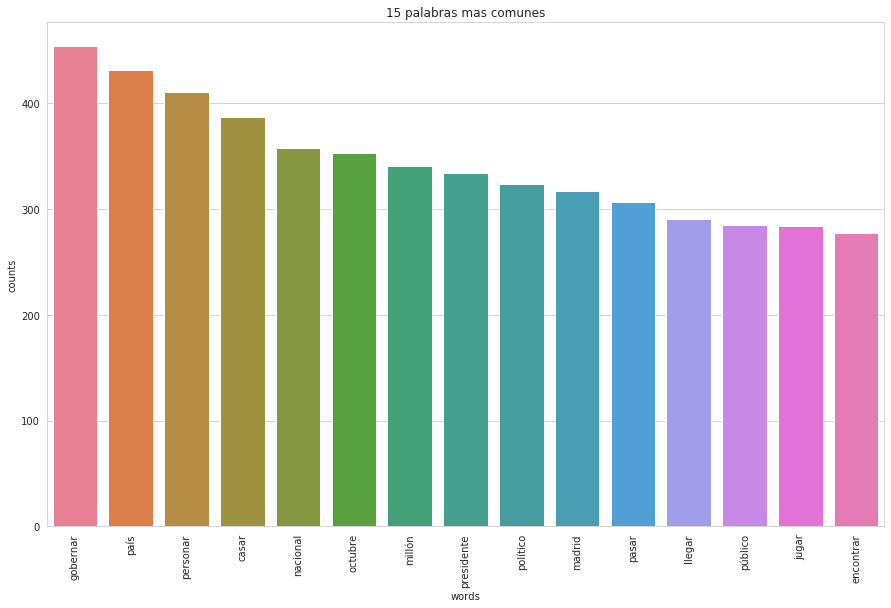

In [0]:
plot_15_most_common_words(bag_of_wors, vectorizer)

### Tf – ponderación del término idf

En un corpus de texto grande, algunas palabras estarán muy presentes (por ejemplo, "el", "a", "es" en inglés), por lo tanto, llevarán muy poca información significativa sobre el contenido real del documento. Si tuviéramos que alimentar los datos de conteo directo directamente a un clasificador, esos términos muy frecuentes sombrearían las frecuencias de términos más raros aún más interesantes.

Para volver a ponderar las características de conteo en valores de coma flotante adecuados para su uso por un clasificador, es muy común usar la transformación tf-idf.

Tf significa frecuencia de término, mientras que tf – idf significa frecuencia de término por frecuencia de documento inversa :

![texto alternativo](https://i.imgur.com/bKiTlAO.png)

Usando las TfidfTransformerconfiguraciones predeterminadas, la frecuencia del término, la cantidad de veces que un término ocurre en un documento dado, se multiplica con el componente idf, que se calcula comoTfidfTransformer(norm='l2', use_idf=True, smooth_idf=True, sublinear_tf=False)

![texto alternativo](https://i.imgur.com/SSSZe8z.png)

dónde n es el número total de documentos en el conjunto de documentos y df(t) es el número de documentos en el conjunto de documentos que contienen el término t. Los vectores tf-idf resultantes se normalizan por la norma euclidiana:

![texto alternativo](https://i.imgur.com/j6dOVXy.png)

Originalmente, este era un esquema de ponderación de términos desarrollado para la recuperación de información (como una función de clasificación para los resultados de los motores de búsqueda) que también ha encontrado un buen uso en la clasificación y agrupación de documentos.

### Implementacion de la transformacion IDF

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#tfidf_transformer.fit(bag_of_wors)

In [0]:
#Metodo 1
tfidf_transformer.fit(bag_of_wors)
tfidf=tfidf_transformer.transform(bag_of_wors)

In [0]:
#Metodo 2
idf = tfidf_transformer.fit_transform(bag_of_wors)

### Parametros

In [0]:
idf

<1000x5913 sparse matrix of type '<class 'numpy.float64'>'
	with 87831 stored elements in Compressed Sparse Row format>

In [0]:
tfidf

<1000x5913 sparse matrix of type '<class 'numpy.float64'>'
	with 87831 stored elements in Compressed Sparse Row format>

Cada fila está normalizada para tener una unidad de norma euclidiana:

![texto alternativo](https://i.imgur.com/8UEBSad.png)

El calculo realizado para calcular el IDF vendria siendo:


![texto alternativo](https://i.imgur.com/1ZoW3UO.png)

Ahora, repetimos este cálculo para los 2 términos restantes en el documento, obteniendo:

![texto alternativo](https://i.imgur.com/bxlOG0b.png)

Luego, aplicando la norma Euclidiana (L2), obtenemos los siguientes tf-idfs para el documento 1:

![texto alternativo](https://i.imgur.com/VUiHf3s.png)

Además, el parámetro predeterminado smooth_idf=Trueagrega "1" al numerador y al denominador como si se viera un documento adicional que contiene todos los términos de la colección exactamente una vez, lo que evita divisiones cero:

![texto alternativo](https://i.imgur.com/ELSU9QO.png)

Con esta modificación, el tf-idf del tercer término en el documento 1 cambia a 1.8473:

![texto alternativo](https://i.imgur.com/XrXklzg.png)

Y el tf-idf normalizado L2 cambia a

![texto alternativo](https://i.imgur.com/hPejvzf.png)

Los pesos de cada característica calculada por la fitllamada al método se almacenan en un atributo modelo:

In [0]:
tfidf_transformer.idf_

array([5.34380542, 4.17108516, 6.52246042, ..., 5.7115302 , 3.37615529,
       5.42384813])

Frecuencias de palabras

In [0]:
# print idf values
df_idf = pd.DataFrame(tfidf_transformer.idf_, index=vectorizer.get_feature_names(),columns=["idf_weights"])
 
# sort ascending
df_idf.sort_values(by=['idf_weights'])

idf_weights
octubre        2.483805
personar       2.492654
casar          2.492654
país           2.533476
pasar          2.556897
...                 ...
fascinante     6.522460
imitar         6.522460
cómico         6.522460
berlin         6.522460
perdido        6.522460

[5913 rows x 1 columns]

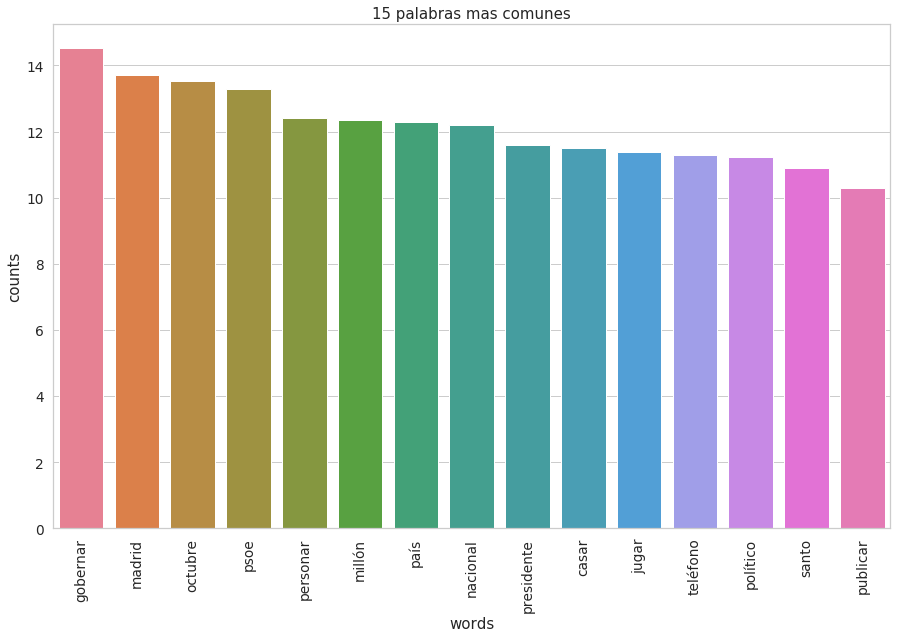

In [0]:
#palabras mas representativas
plot_15_most_common_words(tfidf, vectorizer)

Visualizacion de frecuencia de datos

###Falta Grafico

ValueError: ignored

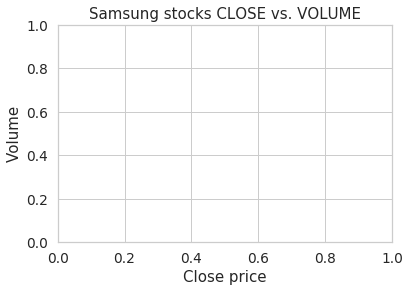

In [0]:
len(tfidf_transformer.idf_)

5913

In [0]:
tfidf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.05659274, 0.        , ..., 0.        , 0.04580724,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.03490106,
        0.        ]])

## Modelado de temas (https://monkeylearn.com/topic-analysis/)

El modelado de temas resuelve el siguiente tipo de problema: tiene un conjunto de documentos de texto (como correos electrónicos, respuestas a encuestas, tickets de soporte, revisiones de productos, etc.) y desea conocer los diferentes temas que cubren y agruparlos por temas

La forma en que funcionan estos algoritmos es asumiendo que cada documento está compuesto por una mezcla de temas, y luego tratando de descubrir qué tan fuerte es la presencia de cada tema en un documento dado. Esto se realiza agrupando los documentos en función de las palabras que contienen y observando las correlaciones entre ellos.

### Asignación de Dirichlet Latente (LDA) (https://scikit-learn.org/stable/modules/decomposition.html#nmf)

La asignación de Dirichlet latente es un modelo probabilístico generativo para colecciones de conjuntos de datos discretos, como corpus de texto. También es un modelo de tema que se utiliza para descubrir temas abstractos de una colección de documentos.

El modelo gráfico de LDA es un modelo generativo de tres niveles:

![texto alternativo](https://scikit-learn.org/stable/_images/lda_model_graph.png)

**Nota** sobre las notaciones presentadas en el modelo gráfico anterior, que se puede encontrar en Hoffman et al. (2013):

*   El corpus es una colección de D documentos.
*   Un documento es una secuencia de N palabras.
*   Existen K temas en el corpus.
*   Los cuadros representan muestras repetidas.

En el modelo gráfico, cada nodo es una variable aleatoria y tiene un papel en el proceso generativo. Un nodo sombreado indica una variable observada y un nodo no sombreado indica una variable oculta (latente). En este caso, las palabras en el corpus son los únicos datos que observamos. Las variables latentes determinan la mezcla aleatoria de temas en el corpus y la distribución de palabras en los documentos. El objetivo de LDA es usar las palabras observadas para inferir la estructura oculta del tema.

Al modelar corpus de texto, el modelo asume el siguiente proceso generativo para un corpus con D documentos y K temas, con K correspondiente a n_components en la API:

![texto alternativo](https://i.imgur.com/WdGRiM3.png)

Para la estimación de parámetros, la distribución posterior es:

![texto alternativo](https://i.imgur.com/CtzqcG7.png)

![texto alternativo](https://i.imgur.com/undkRCG.png)

LatentDirichletAllocation implementa el algoritmo Bayes variacional en línea y admite métodos de actualización en línea y por lotes. Mientras que el método por lotes actualiza las variables variacionales después de cada pase completo a través de los datos, el método en línea actualiza las variables variacionales desde los puntos de datos de mini lotes.

**Nota:** Aunque se garantiza que el método en línea converge a un punto óptimo local, la calidad del punto óptimo y la velocidad de convergencia pueden depender del tamaño del mini lote y los atributos relacionados con la configuración de la tasa de aprendizaje.

Cuando LatentDirichletAllocation se aplica en una matriz "documento-término", la matriz se descompondrá en una matriz "tema-término" y una matriz "documento-tema". Si bien la matriz "tema-término" se almacena como components_en el modelo, la matriz "tema-documento" se puede calcular a partir del transformmétodo.

LatentDirichletAllocation También implementa el partial_fitmétodo. Esto se usa cuando los datos se pueden recuperar secuencialmente.

**Generar modelo**

In [0]:
from sklearn.decomposition import LatentDirichletAllocation

**Parametros**


*   n_components (numero de temas)
*   doc_topic_prior (Distribución previa del tema del documento)
*   topic_word_prior (Prioridad del tema de distribución de palabras)
*   learning_metod (Método utilizado para actualizar _component. Solo se usa en el fitmétodo. En general, si el tamaño de los datos es grande, la actualización en línea será mucho más rápida que la actualización por lotes.) - ('batch': Batch variational Bayes method. Use all training data in each EM update.
  Old `components_` will be overwritten in each iteration.
'online': Online variational Bayes method. In each EM update, use
  mini-batch of training data to update the components_
  variable incrementally. The learning rate is controlled by the
  learning_decay and the learning_offset parameters.)
*   learning_decay (Es un parámetro que controla la tasa de aprendizaje en el método de aprendizaje en línea. El valor debe establecerse entre (0.5, 1.0] para garantizar la convergencia asintótica. Cuando el valor es 0.0 y el tamaño del lote es n_samples, el método de actualización es el mismo que el aprendizaje por lotes.)
*   learning_offset (Un parámetro (positivo) que contrarresta las primeras iteraciones en el aprendizaje en línea. Debería ser mayor que 1.0. En la literatura, esto se llama tau_0.)
*   max_iter (El número máximo de iteraciones)
*   batch_size (Número de documentos a utilizar en cada iteración EM. Solo se utiliza en el aprendizaje en línea.)
*   evaluate_every (Con qué frecuencia evaluar la perplejidad. Solo se usa en el fitmétodo. configúrelo en 0 o número negativo para no evaluar la perplejidad en el entrenamiento en absoluto. Evaluar la perplejidad puede ayudarlo a verificar la convergencia en el proceso de capacitación, pero también aumentará el tiempo total de capacitación. Evaluar la perplejidad en cada iteración podría aumentar el tiempo de entrenamiento hasta dos veces.
*   total_samples (Número total de documentos. Solo se usa en el partial_fitmétodo.)
*   perp_tol (Tolerancia de perplejidad en el aprendizaje por lotes. Solo se usa cuando evaluate_everyes mayor que 0.)
*   mean_change_tol (Detener la tolerancia para actualizar la distribución de temas de documentos en E-step.)
*   max_doc_update_iter (Número máximo de iteraciones para actualizar la distribución de temas del documento en el E-step.)
*   n_jobs (El número de trabajos a usar en el E-step. Nonesignifica 1 a menos que esté en un joblib.parallel_backendcontexto. -1significa usar todos los procesadores. Ver Glosario para más detalles.)
*   verbose (Nivel de verbosidad.)
*   random_state (Si int, random_state es la semilla utilizada por el generador de números aleatorios; Si es una instancia RandomState, random_state es el generador de números aleatorios; Si ninguno, el generador de números aleatorios es la instancia RandomState utilizada por np.random.)



In [0]:
LDA = LatentDirichletAllocation(n_components=3,random_state=0,n_jobs=-1)

In [0]:
fit_lda = LDA.fit(tfidf)#bag_of_wors)#tfidf)

In [24]:
fit_lda

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=3, n_jobs=-1,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
transform_lda = fit_lda.transform(tfidf)#bag_of_wors)#tfidf)

### Parametros

In [0]:
Çtransform_lda

array([[0.03391356, 0.03270529, 0.03271917, 0.86795547, 0.03270651],
       [0.02167063, 0.02166995, 0.02167179, 0.91331739, 0.02167024],
       [0.02097257, 0.02100356, 0.02101198, 0.91603959, 0.0209723 ],
       ...,
       [0.02865733, 0.02865834, 0.02865716, 0.88537022, 0.02865695],
       [0.0300128 , 0.03001216, 0.03001259, 0.87994978, 0.03001266],
       [0.01503056, 0.0150586 , 0.01504025, 0.93983868, 0.0150319 ]])

Diagnosticar el rendimiento del modelo utilizando perplejidad y probabilidad de registro
**Nota:** Se prefiere un modelo con mayor probabilidad logarítmica y menor perplejidad.

In [0]:
fit_lda.perplexity(tfidf)

14230.560669422928

In [0]:
fit_lda.score(tfidf)

-68996.15925574559

### Busqueda de cuadricula para encontrar el mejor mdelo y componentes

GridSearch

In [0]:
#DEFINIENDO LOS PARAMETROS DE BUSQUEDA
search_params = {'n_components':[3,4,5,6,7,10,15,20],'learning_decay':[.5,.7,.9],'n_jobs':[-1]}

In [0]:
#INICIANDO EL MODELO
from sklearn.decomposition import LatentDirichletAllocation
ldaa= LatentDirichletAllocation()

In [0]:
from sklearn.model_selection import GridSearchCV
#INICIANDO LA CLASE GRID SEARCH
model = GridSearchCV(ldaa,param_grid=search_params)

In [29]:
#HACER UNA BUSQUEDA DE CUADRIC
model.fit(tfidf)#bag_of_wors)

GridSearchCV(cv=None, error_score=nan,
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 tota

In [0]:
#Mejor modelo
best_lda_model=model.best_estimator_

### Caracteristicas

In [0]:
#Paramtros modelo
print("Best Model's Params: ",model.best_params_)

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 3, 'n_jobs': -1}


In [0]:
#REgistro ed puntaje de probabilidad
print("Mejor puntaje de probabilidad: ",model.best_score_)

Mejor puntaje de probabilidad:  -224656.09810507894


In [0]:
#Perplejidad
print("Modelo prerplejidad: ", best_lda_model.perplexity(res))

Modelo prerplejidad:  2885.2290251158224


In [0]:
best_lda_model.components_

array([[ 1.45267249, 17.7627347 ,  0.33337848, ...,  3.70795999,
        35.07058065, 12.91756151],
       [ 4.72332984, 22.53473856,  1.74441797, ...,  4.95736902,
        34.61905205,  0.41554982],
       [ 7.82399767, 15.70252673,  1.92220355, ...,  0.33467099,
        34.3103673 ,  1.66688866]])

In [0]:
#for gscore in model.cv_results_:
#    print(gscore)
lista=[]
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
for gscore,params in zip(gscore,params): 
    if params==0.5:
        lista.append(gscore)
        
print(lista)

[-225094.4732442678, -229327.10389854567, -233955.454418521, -238279.83217339846, -242457.3973702307, -252421.28852199978, -268685.24518733815, -281185.6493111808]


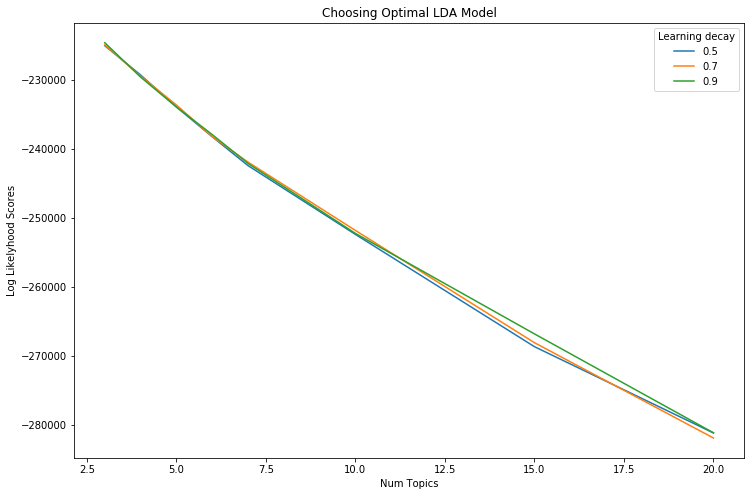

In [0]:
import matplotlib.pyplot as plt
# Obtenga probabilidades de registro de la salida de búsqueda de cuadrícula
n_topics=[3,4,5,6,7,10,15,20]
#model.cv_results_['mean_test_score'],model.cv_results_['param_learning_decay']
gscore = model.cv_results_['mean_test_score']
params = model.cv_results_['param_learning_decay']
Log_likelyoods_5=[]
Log_likelyoods_7=[]
Log_likelyoods_9=[]
for gscore,params in zip(gscore,params):
    if params==0.5:
        Log_likelyoods_5.append(round(gscore))
    if params==0.7:
        Log_likelyoods_7.append(round(gscore))
    if params==0.9:
        Log_likelyoods_9.append(round(gscore))

#Log_likelyoods_5 = [round (mean) for mean,param in zip(means,params) if params==0.5]
#Log_likelyoods_7 = [round (mean) for mean,param in zip(means,params) if params==0.7]
#Log_likelyoods_9 = [round (mean) for mean,param in zip(means,params) if params==0.9]
#Log_likelyoods_5 = [for gscore,param in zip(gscore,params): if params==0.5: round(gscore)]
#Log_likelyoods_7 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.7]
#Log_likelyoods_9 = [round(gscore.mean_validation_score) for gscore in model if gscore.parameters['learning_decay']==0.9]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, Log_likelyoods_5, label='0.5')
plt.plot(n_topics, Log_likelyoods_7, label='0.7')
plt.plot(n_topics, Log_likelyoods_9, label='0.9')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()


In [0]:
df_cv_results = pd.DataFrame(model.cv_results_)

In [0]:
df_cv_results.to_csv("LDAGridSearchResults.csv", header=True, index=False, encoding='utf-8')

In [0]:
import seaborn as sns

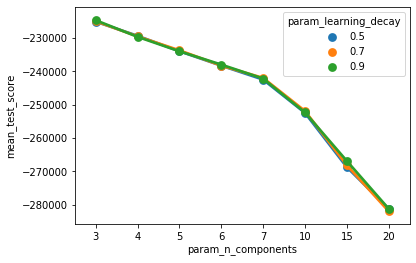

In [0]:
sns.pointplot(x="param_n_components", y="mean_test_score", hue="param_learning_decay", data=df_cv_results)

### Guardar modelo

In [0]:
#Crear documentos- Matriz de temas
lda_output = best_lda_model.transform(tfidf)#bag_of_wors)#tfidf)

### Tema dominante en el texto

In [0]:
#Nombre de columnas
topicnames = []
for i in range(int(best_lda_model.n_components)):#best_lda_model.n_components)):
    name='Topic'+str(i)
    topicnames.append(name)

In [0]:
#nombre de indices
docnames = []
#for i in range(len(cv.get_feature_names())):
for i in range(len(df['News'])):
    docnames.append('Doc'+str(i))

In [0]:
import numpy as np
#Creando un dataframe en pandas
df_document_topic=pd.DataFrame(np.round(lda_output,2),columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(transform_lda,columns=topicnames,index=docnames)
#df_document_topic=pd.DataFrame(lda_output,columns=topicnames,index=docnames)

In [59]:
df_document_topic

Topic0  Topic1  Topic2
Doc0      0.06    0.89    0.06
Doc1      0.04    0.93    0.04
Doc2      0.04    0.93    0.04
Doc3      0.20    0.76    0.04
Doc4      0.08    0.08    0.83
...        ...     ...     ...
Doc995    0.04    0.92    0.04
Doc996    0.04    0.92    0.04
Doc997    0.05    0.90    0.05
Doc998    0.05    0.90    0.05
Doc999    0.03    0.95    0.03

[1000 rows x 3 columns]

In [0]:
# Obtener tema dominante para cada documento
dominant_topic=np.argmax(df_document_topic.values,axis=1)
df_document_topic['dominant_topic']=dominant_topic
df['dominant_topic']=dominant_topic

In [0]:
#Estilando
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

In [61]:
#Aplicando estilo
#df_document_topic=df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
#df_document_topic=df_document_topic.style.applymap(color_green).applymap(make_bold)
df_document_topic

Topic0  Topic1  Topic2  dominant_topic
Doc0      0.06    0.89    0.06               1
Doc1      0.04    0.93    0.04               1
Doc2      0.04    0.93    0.04               1
Doc3      0.20    0.76    0.04               1
Doc4      0.08    0.08    0.83               2
...        ...     ...     ...             ...
Doc995    0.04    0.92    0.04               1
Doc996    0.04    0.92    0.04               1
Doc997    0.05    0.90    0.05               1
Doc998    0.05    0.90    0.05               1
Doc999    0.03    0.95    0.03               1

[1000 rows x 4 columns]

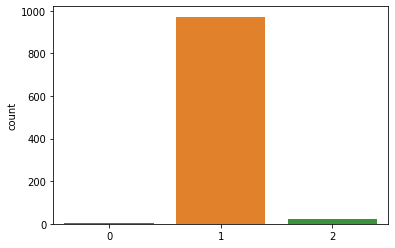

In [62]:
import seaborn as sns
sns.countplot(dominant_topic)

## Visualizacion de datos

### Obtenga las palabras clave de cada tema

In [0]:
best_lda_model.components_.shape

(3, 5913)

In [0]:
tfidf.shape

(1000, 5913)

In [0]:
# Topic - Keyword matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

# assign column and index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames


# check the head
df_topic_keywords.iloc[:,:10]

abajar  abandonar      abar  ...  abiertamente    abocar     abogar
Topic0  1.452672  17.762735  0.333378  ...      1.339468  5.330556  24.937289
Topic1  4.723330  22.534739  1.744418  ...      1.327090  0.336094  37.205470
Topic2  7.823998  15.702527  1.922204  ...      1.333443  0.333350   9.857242

[3 rows x 10 columns]

In [0]:
len(vectorizer.get_feature_names())

5913

15 palabrasclaves del tema

In [0]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

In [0]:
topic_keywords = show_topics(vectorizer, best_lda_model, 20)

In [123]:
topic_keywords

[array(['trump', 'router', 'clinton', 'bank', 'self', 'hillary', 'miss',
        'descubrimiento', 'barril', 'opep', 'secció', 'petróleo', 'donald',
        'anuncio', 'nobel', 'allianz', 'tokio', 'sortear', 'karolinska',
        'célula'], dtype='<U18'),
 array(['gobernar', 'madrid', 'octubre', 'psoe', 'personar', 'millón',
        'país', 'nacional', 'presidente', 'casar', 'jugar', 'político',
        'santo', 'publicar', 'público', 'mesar', 'punto', 'septiembre',
        'llegar', 'semana'], dtype='<U18'),
 array(['teléfono', 'email', 'correcto', 'apremiar', 'subastar', 'karma',
        'urls', 'juzgar', 'formato', 'judicial', 'mail', 'introducir',
        'contactar', 'identificacin', 'electr', 'aceptar', 'dirección',
        'contener', 'condicionar', 'número'], dtype='<U18')]

In [0]:
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0      Word 1    Word 2  ...    Word 17     Word 18    Word 19
Topic 0  personar    contener  publicar  ...     ciudad        dato  presentar
Topic 1     jugar     equipar   octubre  ...  encontrar      semana     minuto
Topic 2  gobernar  presidente      psoe  ...   elección  secretario   congreso

[3 rows x 20 columns]

## Distribución de frecuencia de conteos de palabras en documentos
Al trabajar con una gran cantidad de documentos, desea saber qué tan grandes son los documentos en su conjunto y por tema. Tracemos la distribución de los recuentos de palabras del documento.



In [0]:
import matplotlib.pyplot as plt

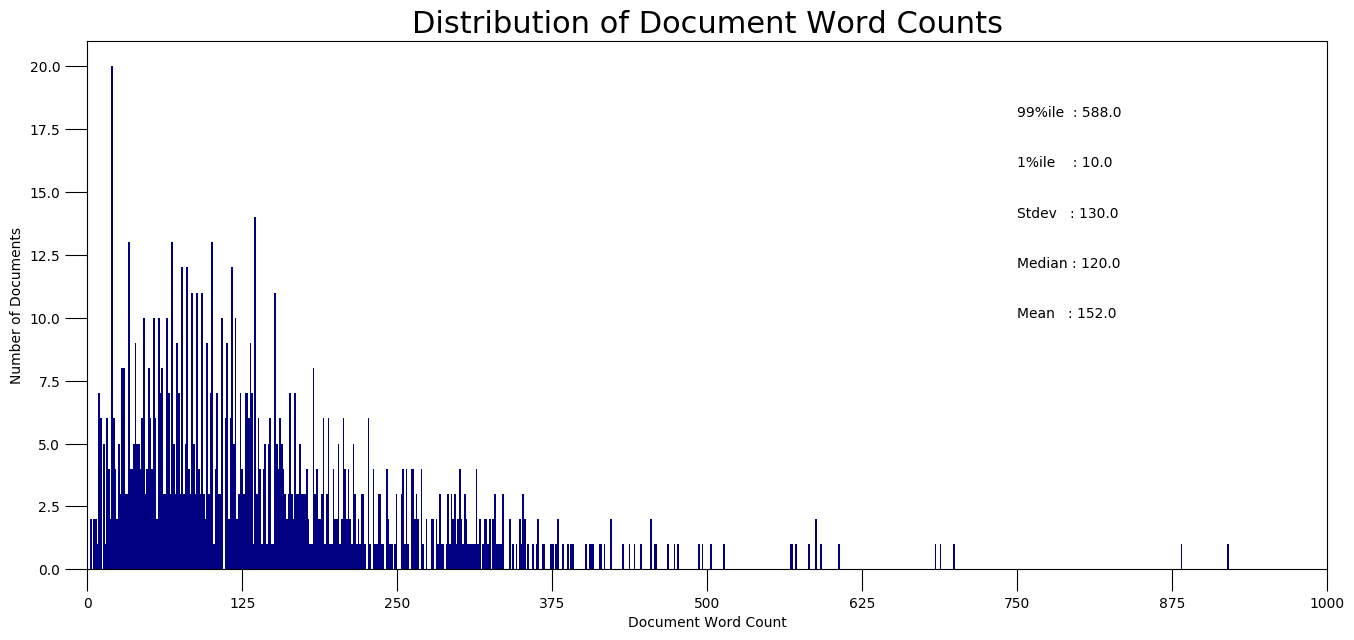

In [65]:
doc_lens = [len(d) for d in df.text]

# Plot
plt.figure(figsize=(16,7), dpi=100)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 10, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  12, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  14, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  16, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  18, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

In [79]:
df.loc[df.dominant_topic == 0, :]

News  ... dominant_topic
413  és Yoshinori Ohsumi ha ganado el Premio Nobel ...  ...              0
739  Muy buenas, recientemente me han instalado fib...  ...              0
816  el ‎02-10-2016 16:19:36 \nHolaTengo una instal...  ...              0
986  CIENCIA Nobel de Física para tres científicos ...  ...              0

[4 rows x 3 columns]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


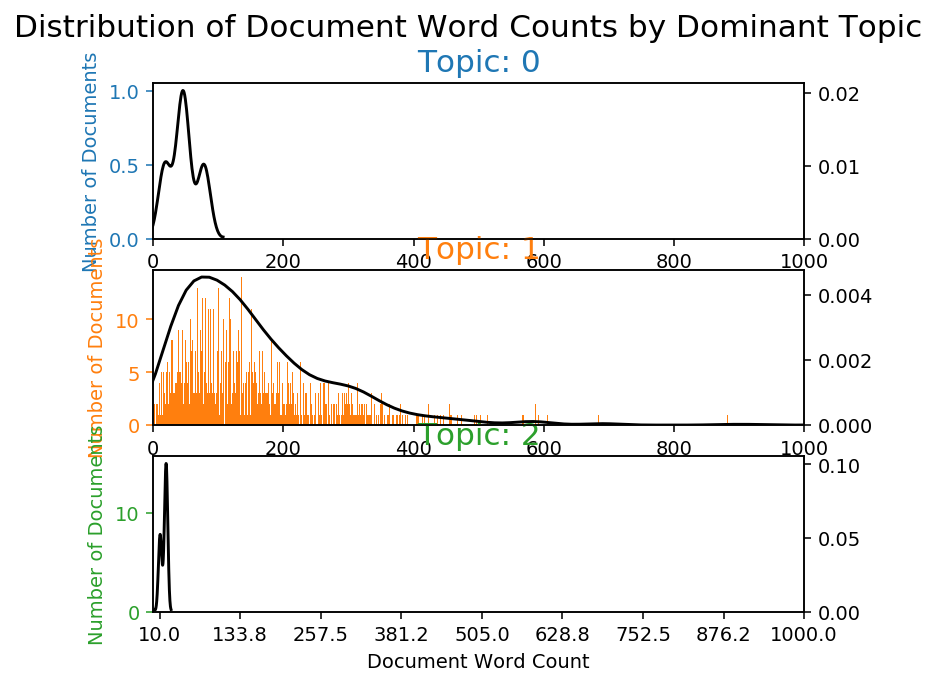

In [120]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(3,1,figsize=(6,5), dpi=140)

for i, ax in enumerate(axes.flatten()):    
  df_dominant_topic_sub = df.loc[df.dominant_topic == i, :]
  doc_lens = [len(d) for d in df_dominant_topic_sub.text]
  ax.hist(doc_lens, bins = 1000, color=cols[i])
  ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
  ax.set(xlim=(0, 1000), xlabel='Document Word Count')
  ax.set_ylabel('Number of Documents', color=cols[i])
  ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout(h_pad=10,w_pad=10)
#fig.subplots_adjust(hspace=10,wspace=5)
plt.xticks(np.linspace(10,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=16)
plt.show()

### Nubes de palabras de las palabras clave N principales en cada tema

In [185]:
top =[(-topic_weights).argsort() for topic_weights in best_lda_model.components_]
top

[array([5588, 4986, 1062, ..., 3071, 2865, 1978]),
 array([2644, 3449, 3945, ..., 2865, 3071, 3058]),
 array([5413, 1999, 1393, ..., 3488, 4783, 3919])]

In [184]:
keywords = np.array(vectorizer.get_feature_names())
type(keywords)
topic_keywords = []
for topic_weights in best_lda_model.components_:
  top_keyword_locs = (-topic_weights).argsort()
  print(x)
  dictWords={keywords.take(x):x for x in top_keyword_locs}
    #print(x)
    #topic_keywords.append(keywords.take(top_keyword_locs))

ValueError: ignored

In [181]:
dictWords

{'teléfono': 5413,
 'email': 1999,
 'correcto': 1393,
 'apremiar': 392,
 'subastar': 5287,
 'karma': 3252,
 'urls': 5651,
 'juzgar': 3246,
 'formato': 2489,
 'judicial': 3221,
 'mail': 3461,
 'introducir': 3123,
 'contactar': 1309,
 'identificacin': 2865,
 'electr': 1978,
 'aceptar': 49,
 'dirección': 1801,
 'contener': 1319,
 'condicionar': 1219,
 'número': 3903,
 'nombrar': 3865,
 'preguntar': 4392,
 'deber': 1560,
 'anunciar': 358,
 'instrucc': 3071,
 'inst': 3058,
 'menéame': 3600,
 'autentifícate': 538,
 'instancia': 3062,
 'salvador': 5042,
 'identificación': 2866,
 'electrónico': 1982,
 'voto': 5822,
 'letrado': 3324,
 'instrucción': 3072,
 'rigor': 4935,
 'cláusula': 1065,
 'plegar': 4288,
 'georgia': 2617,
 'texto': 5458,
 'solvencia': 5239,
 'tertulio': 5450,
 'palmar': 4058,
 'administració': 118,
 'asustar': 491,
 'george': 2616,
 'irrelevante': 3158,
 'explotar': 2324,
 'ocio': 3940,
 'duplicar': 1909,
 'desear': 1681,
 'mierda': 3632,
 'canario': 835,
 'especificar': 2182

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


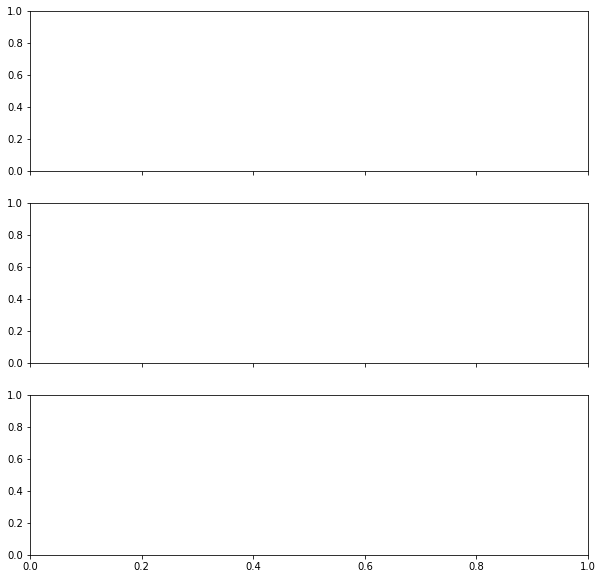

In [146]:
fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)
keywords = np.array(vectorizer.get_feature_names())
for i, ax in enumerate(axes.flatten()):
  print(type(topic_keywords[i]))

In [159]:
keywords[0]

'abajar'

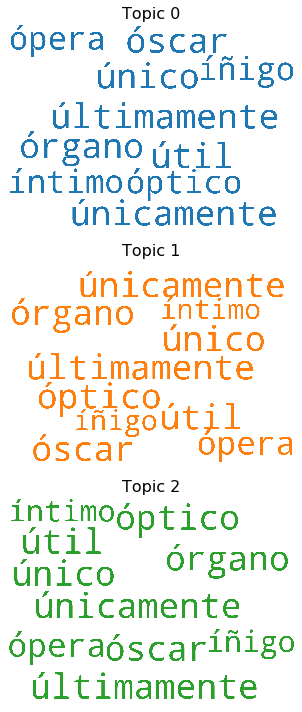

In [182]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=nlp.Defaults.stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

#topics = best_lda_model.show_topics(formatted=False)
#topics = count_train.vocabulary_

fig, axes = plt.subplots(3, 1, figsize=(10,10), sharex=True, sharey=True)

topic_keywords = []
for topic_weights in best_lda_model.components_:
  top_keyword_locs = (-topic_weights).argsort()
  print(keywords.take(x))
  dictWords={keywords.take(x):x for x in top_keyword_locs}

for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  #topic_words = dict(topic_keywords[i][1])
  cloud.generate_from_frequencies(dictWords, max_font_size=300,)
  #cloud.generate(topic_keywords)
  plt.gca().imshow(cloud)
  plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
  plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Visualizacion pyLDAvis

In [0]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.7MB/s 
     |████████████████████████████████| 552kB 21.8MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=e4bdc591ce05304c7610cb67fbc8167043a8cdf83db079c40d4bf2d3acb80dce
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=7a268078400eb9775c8cd7bfaad7924ef722ec8ad1c85b8d3360790ba15d5e28
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [0]:
import pyLDAvis
panel = pyLDAvis.sklearn.prepare(best_lda_model, tfidf, vectorizer, mds='tsne')
pyLDAvis.display(panel)

Distribucion de temas en el texto

In [0]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)

In [0]:
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames

In [0]:
# View
df_topic_keywords.head()

abajar  abandonar      abar  ...  únicamente      único       útil
Topic0   0.354398   2.031472  0.333368  ...    1.972012  16.398870  14.055962
Topic1  11.193559  21.863571  3.330606  ...    0.377715  48.161137   0.538221
Topic2   2.452043  32.104957  0.336026  ...    6.650272  39.439993   0.405817

[3 rows x 5913 columns]

In [0]:
df_topic_keywords.shape

(3, 5913)

In [0]:
# Show top n keywords for each topic
def show_topics(cv=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(cv.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(cv=vectorizer, lda_model=best_lda_model, n_words=15)        

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

Word 0      Word 1    Word 2  ...    Word 12      Word 13  Word 14
Topic 0  personar    contener  publicar  ...      grupo  desarrollar  usuario
Topic 1     jugar     equipar   octubre  ...  temporada      domingo     real
Topic 2  gobernar  presidente      psoe  ...      mesar        votar    pagar

[3 rows x 15 columns]

Captar las palabras de mayor probabilidad por tema

In [0]:
for index,topic in enumerate(best_lda_model.components_):
    print(f'Las principales 15 palabras del tema #(index)')
    print([vectorizer.get_feature_names()[index] for index in topic.argsort()[-100:]])
    print('\n')
    print('\n')

Las principales 15 palabras del tema #(index)
['vivienda', 'región', 'civil', 'educación', 'mejorar', 'número', 'punto', 'lunes', 'entender', 'aguar', 'cambiar', 'afectar', 'buscar', 'europeo', 'compartir', 'edad', 'marcar', 'internacional', 'querer', 'explicar', 'nacional', 'menor', 'llegar', 'pagar', 'financiero', 'seguridad', 'condicionar', 'resultar', 'programar', 'alto', 'temer', 'producto', 'sirio', 'importante', 'euro', 'sistema', 'político', 'gobernar', 'parir', 'sociedad', 'ayudar', 'pedir', 'estudiante', 'deber', 'banco', 'investigación', 'comercial', 'población', 'capital', 'responsable', 'encontrar', 'octubre', 'pasar', 'tipo', 'considerar', 'vida', 'actividad', 'público', 'niño', 'permitir', 'españa', 'aumentar', 'mercar', 'información', 'teléfono', 'foto', 'relacionar', 'comunidad', 'seguir', 'centrar', 'diario', 'estudiar', 'comentario', 'informar', 'trump', 'registrar', 'mantener', 'mostrar', 'zona', 'riesgo', 'presentar', 'dato', 'ciudad', 'septiembre', 'servicio', 'us

## SOM

In [0]:
!pip install somoclu

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline

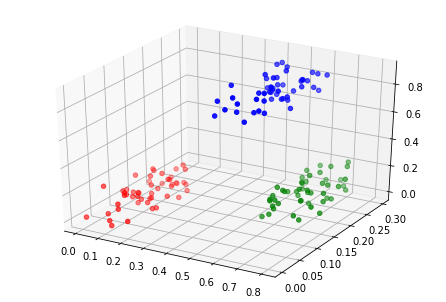

In [0]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:, 0], data[:, 1], data[:, 2], c=colors)
labels = range(150)

In [0]:
data

array([[1.25515059e-01, 7.49984682e-02, 1.30714327e-01],
       [7.31085241e-03, 6.14569103e-03, 2.08326634e-02],
       [1.15148440e-01, 8.72440934e-02, 5.95139749e-02],
       [1.08538233e-01, 1.18934430e-01, 4.91962545e-02],
       [9.81138945e-02, 1.24829829e-01, 1.00629084e-01],
       [1.67845096e-02, 9.67108831e-02, 7.37121478e-02],
       [2.64402814e-02, 1.25574455e-01, 1.50590912e-01],
       [1.07900403e-01, 1.89155266e-01, 1.21543221e-02],
       [1.14163555e-01, 4.67316713e-03, 3.50309350e-02],
       [7.93690905e-02, 1.65275678e-01, 4.12576534e-02],
       [1.93021730e-01, 1.41516775e-01, 1.21816555e-02],
       [7.50817657e-02, 7.18926489e-02, 1.05049759e-01],
       [6.40218705e-02, 9.67228040e-02, 8.05836394e-02],
       [1.47638500e-01, 1.49609670e-01, 6.87627271e-02],
       [3.10333725e-02, 1.28306508e-01, 1.44138541e-02],
       [1.83527753e-01, 1.15899451e-01, 5.97180352e-02],
       [4.26585078e-02, 1.65636823e-01, 1.27754271e-01],
       [1.59983307e-01, 1.76528

In [0]:
dataframe=df_document_topic

In [0]:
df_document_topic

Topic0    Topic1    Topic2  dominant_topic
Doc0    0.983846  1.007078  1.216116               2
Doc1    0.998671  0.985166  1.231005               2
Doc2    0.987702  0.993498  1.230540               2
Doc3    1.001821  0.985328  1.230370               2
Doc4    1.006400  1.008450  0.491306               1
...          ...       ...       ...             ...
Doc995  0.999097  0.986352  1.222211               2
Doc996  0.998213  0.991859  1.227158               2
Doc997  0.993748  0.987988  1.232906               2
Doc998  0.979812  1.001324  1.235467               2
Doc999  0.991962  0.976719  1.222348               2

[1000 rows x 4 columns]

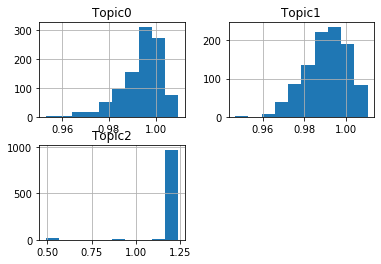

In [0]:
dataframe.drop(['dominant_topic'],1).hist()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


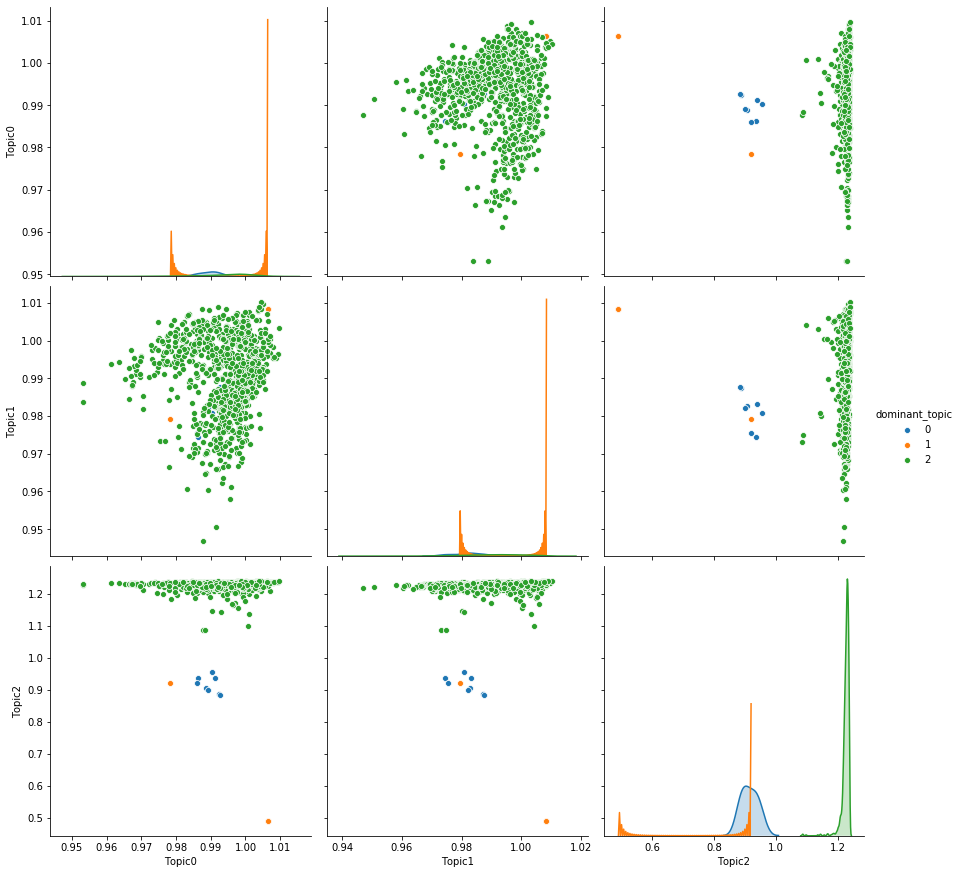

In [0]:
import seaborn as sb
sb.pairplot(dataframe.dropna(), hue='dominant_topic',size=4,vars=["Topic0","Topic1","Topic2"],kind='scatter')

In [0]:
#sb.pairplot(dataframe.dropna(), hue='categoria',size=4,vars=["op","ex","ag"],kind='scatter')
X = np.array(df_document_topic[["Topic0","Topic1","Topic2"]])
y = np.array(df_document_topic['dominant_topic'])
X.shape

(1000, 3)

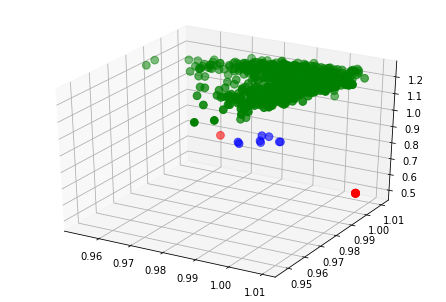

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(kmeans2[:, 0], kmeans2[:, 1], kmeans2[:, 2], c=asignar,s=60)

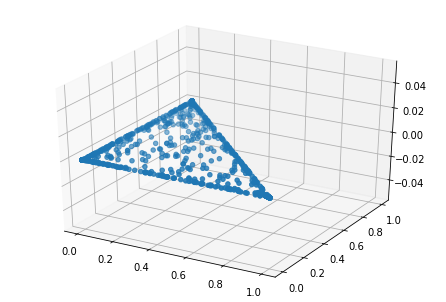

In [0]:
colors = ["red"] * 333
colors.extend(["green"] * 333)
colors.extend(['yellow']*334)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lda_output[:, 0], lda_output[:, 1])#,lda_output[:,2])#, c=colors)

Capacitamos a Somoclu con la configuración de parámetros predeterminada, solicitando un mapa grande que califique como un mapa emergente de autoorganización para estos datos:

In [0]:
n_columns=300
n_rows=350
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
%time som.train(lda_output)

CPU times: user 5min 22s, sys: 539 ms, total: 5min 23s
Wall time: 2min 42s


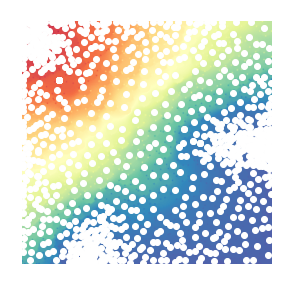

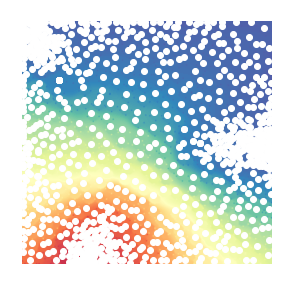

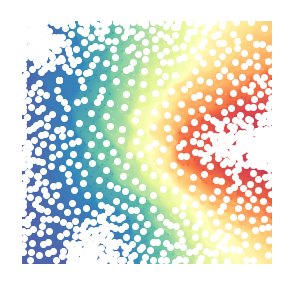

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_component_planes(figsize=(5,5),bestmatches=True)

Podemos trazar la matriz U, junto con las mejores unidades coincidentes para cada punto de datos. Codificamos por color las unidades con las clases de los puntos de datos y también agregamos las etiquetas de los puntos de datos.

In [0]:
y=0
label = []
for x in tfidf.toarray():
  y=y+1
  position = np.where(x == np.amax(x))[0] #Posicion del valor maximo #print(np.amax(x)) #Valor maximo
  label.append(list(vectorizer.vocabulary_.keys())[list(vectorizer.vocabulary_.values()).index(position[0])])
  #print(len(x)) #Largo de arreglo #bag_of_wors.toarray()[y][np.amax(x)[0]]

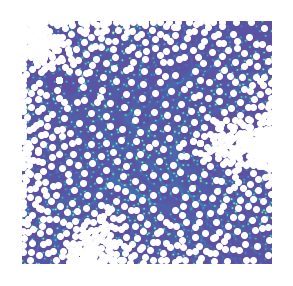

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True,figsize=(5,5)) #bestmatchcolors=colors,

También podemos acercarnos a una región de interés, por ejemplo, la densa esquina inferior derecha:

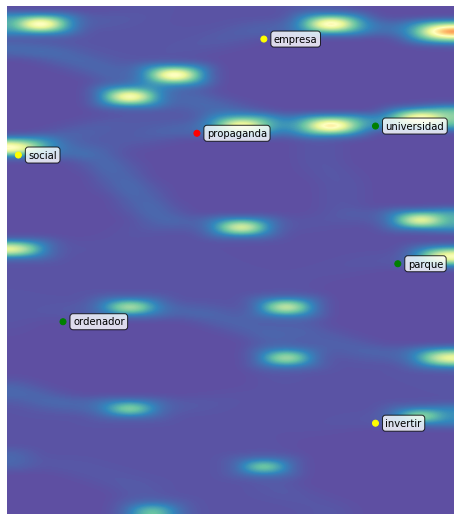

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
import matplotlib
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=label,
                 zoom=((280, n_rows), (280, n_columns)))


### Topología toroidal, rejilla hexagonal 
Podemos repetir lo anterior con una topología toroidal especificando el tipo de mapa de la siguiente manera:

In [0]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False)
som.train(lda_output)

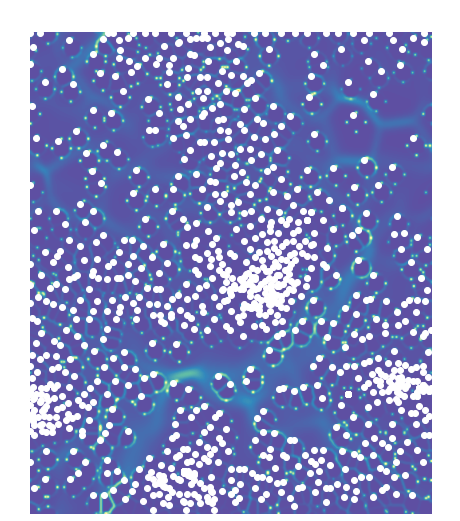

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True)

Observe cómo los bordes del mapa se conectan al otro lado. Las neuronas hexagonales también se implementan:

In [0]:
som = somoclu.Somoclu(n_columns, n_rows, gridtype="hexagonal",
                      compactsupport=False)
som.train(lda_output)

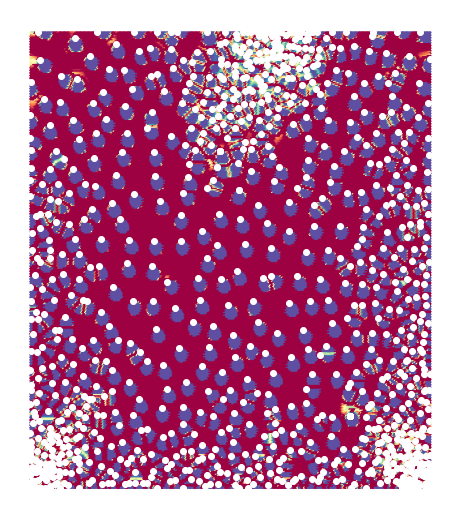

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True)

### Inicialización con análisis de componentes principales y agrupamiento de resultados
Podemos pasar un libro de códigos inicial de nuestra elección, pero también podemos pedirle a Somoclu que inicialice el libro de códigos con vectores del subespacio abarcados por los dos primeros valores propios de la matriz de correlación. Para hacer esto, necesitamos pasar un argumento opcional al constructor:

In [0]:
som = somoclu.Somoclu(n_columns, n_rows, maptype="toroid",
                      compactsupport=False, initialization="pca")
som.train(lda_output)

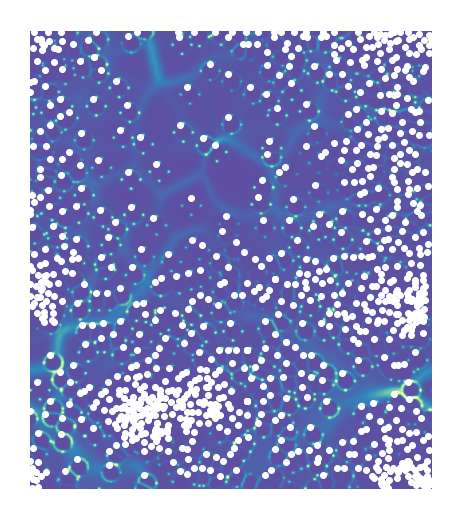

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_umatrix(bestmatches=True)

Si bien uno esperaría resultados completamente deterministas en ejecuciones repetidas con la inicialización basada en PCA, este no es el caso. El orden en que llegan las instancias de datos es importante: dado que Somoclu usa múltiples núcleos, no hay control sobre el orden de cada lote, por lo tanto, los mapas mostrarán una pequeña variación incluso con una inicialización de PCA.

También podemos postprocesar el libro de códigos con un algoritmo de agrupamiento arbitrario que se incluye en scikit-learn . El algoritmo predeterminado es K-means con ocho grupos. Después de la agrupación, las etiquetas para cada nodo están disponibles en el objeto SOM en la clustersvariable de clase. Si no pasamos colores a las funciones de visualización de la matriz y el agrupamiento ya está hecho, las rutinas de trazado colorean automáticamente las mejores unidades de coincidencia de acuerdo con la estructura de agrupamiento.

In [0]:
import sklearn.cluster

In [0]:
kmeans = sklearn.cluster.KMeans(3)

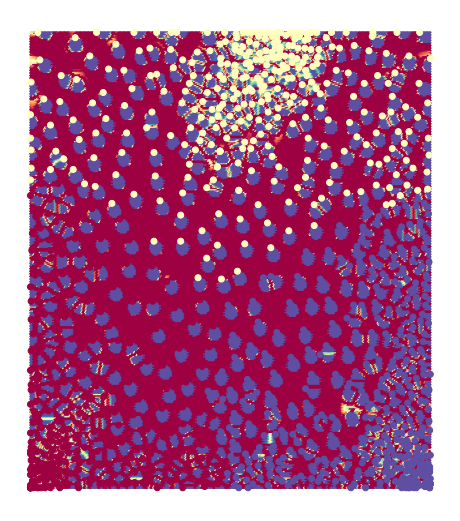

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.cluster(algorithm=kmeans)
som.view_umatrix(bestmatches=True)

In [0]:
Agglomerative_Clusteering = sklearn.cluster.AgglomerativeClustering(3)

In [0]:
som.cluster(algorithm=Agglomerative_Clusteering)
som.view_umatrix(bestmatches=True)

Por supuesto, podemos elegir otro algoritmo de agrupación, pero los métodos de agrupación topológica tendrán poco sentido con su parametrización predeterminada. DBSCAN, por ejemplo, asignará la misma clase a todos los nodos:

In [0]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

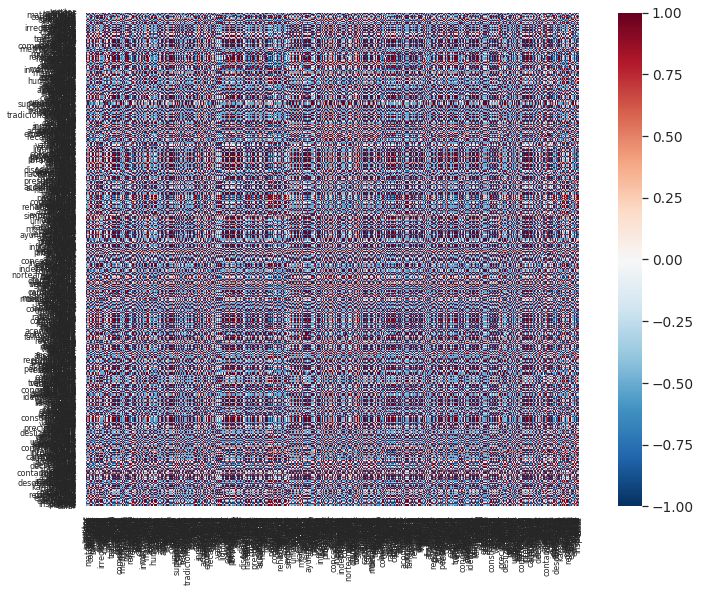

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_similarity_matrix(lda_output,labels=label)

In [0]:
som.n_vectors

1000

In [0]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))

In [0]:
labels = range(150)

In [0]:
labels

range(0, 150)

In [0]:
data.shape

(150, 3)

### Somoclu

In [0]:
!pip install somoclu

     |████████████████████████████████| 6.2MB 2.5MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5-cp36-cp36m-linux_x86_64.whl size=419274 sha256=3373c58b8ee579b1a97ca0a6f81519e2d1a6dd74ac1403285b93726cc7e1b980
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [0]:
c1 = np.random.rand(50, 3)/5
c2 = (0.6, 0.1, 0.05) + np.random.rand(50, 3)/5
c3 = (0.4, 0.1, 0.7) + np.random.rand(50, 3)/5
data = np.float32(np.concatenate((c1, c2, c3)))
colors = ["red"] * 50
colors.extend(["green"] * 50)
#colors.extend(["blue"] * 50)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lda_output[:, 0], lda_output[:, 1],)
#labels = range(150)


TypeError: ignored

<Figure size 432x288 with 0 Axes>

In [0]:
lda_output[:, 0]

array([0.81775053, 0.92796221, 0.06880129, 0.2613236 , 0.87227386,
       0.09978817, 0.60535856, 0.9376401 , 0.77138266, 0.88871402,
       0.71845964, 0.90884818, 0.88801226, 0.77769322, 0.11335562,
       0.8453353 , 0.89929356, 0.43244399, 0.56069498, 0.90630064,
       0.0868699 , 0.90378938, 0.7994511 , 0.88688238, 0.93446242,
       0.7536378 , 0.41272704, 0.8729492 , 0.8043743 , 0.9485066 ,
       0.93209828, 0.0731342 , 0.86395856, 0.87227386, 0.90658718,
       0.22681679, 0.33800171, 0.47336073, 0.92395472, 0.09528223,
       0.07420123, 0.36470565, 0.77332516, 0.35959642, 0.12942328,
       0.73287347, 0.50475612, 0.90255091, 0.09104371, 0.54784237,
       0.18608489, 0.90490793, 0.45181037, 0.54851815, 0.72111519,
       0.08808398, 0.88486932, 0.07077676, 0.10639805, 0.18491213,
       0.09095297, 0.10735185, 0.84695135, 0.18131373, 0.24591495,
       0.85816816, 0.82203099, 0.07461094, 0.94753759, 0.05147318,
       0.09125739, 0.10748515, 0.90367699, 0.88932948, 0.87950

In [0]:
data

array([[0.01054721, 0.10552911, 0.07512378],
       [0.02186544, 0.03158249, 0.01471622],
       [0.11580435, 0.13354659, 0.05498029],
       [0.03903659, 0.17778075, 0.15329148],
       [0.19178903, 0.18904889, 0.01859546],
       [0.14508866, 0.06620996, 0.03126439],
       [0.14329405, 0.19837253, 0.08184429],
       [0.03181418, 0.19048522, 0.05216272],
       [0.04746334, 0.16709796, 0.05289929],
       [0.06556589, 0.04104031, 0.02308443],
       [0.18464598, 0.14285606, 0.01184785],
       [0.15986298, 0.16071384, 0.04405714],
       [0.16175796, 0.03196693, 0.07858934],
       [0.03286645, 0.17841479, 0.10369372],
       [0.18275149, 0.16354659, 0.08506852],
       [0.02265819, 0.05652992, 0.08244567],
       [0.06358752, 0.18942094, 0.09478454],
       [0.1560904 , 0.05026321, 0.0996575 ],
       [0.13810332, 0.16641247, 0.15853988],
       [0.12997718, 0.06417448, 0.14147188],
       [0.11086399, 0.07230015, 0.14058997],
       [0.09155179, 0.0841199 , 0.19058836],
       [0.

In [0]:
lda_output

array([[0.81775053, 0.18224947],
       [0.92796221, 0.07203779],
       [0.06880129, 0.93119871],
       ...,
       [0.62009542, 0.37990458],
       [0.08874209, 0.91125791],
       [0.90276304, 0.09723696]])

In [0]:
!pip install sompy

  Created wheel for sompy: filename=sompy-0.1.1-py2.py3-none-any.whl size=3085 sha256=014c92fa59c6e9d20fa912380dbb1fb519784bd267a74c44f9e0626b528c1e46
  Stored in directory: /root/.cache/pip/wheels/1f/42/7d/e9840b06153bd7e5cefa2ea2e4987f49c3fe37c1801948ea42
Successfully built sompy


In [0]:
!pip install git+https://github.com/sevamoo/SOMPY

  Cloning https://github.com/sevamoo/SOMPY to /tmp/pip-req-build-muvl8btq
  Running command git clone -q https://github.com/sevamoo/SOMPY /tmp/pip-req-build-muvl8btq
  Created wheel for SOMPY: filename=SOMPY-1.1-cp36-none-any.whl size=28117 sha256=c648c7d8cc07f566aa5b9288e85e384cbba712aca6cd6d9d7e5a9706e1e2134f
  Stored in directory: /tmp/pip-ephem-wheel-cache-3y25id4q/wheels/89/eb/f9/61aa37e7c35ddc5fdaeb57dae54241a1a80bdd472cce3024fa
Successfully built SOMPY
  Found existing installation: sompy 0.1.1
    Uninstalling sompy-0.1.1:
      Successfully uninstalled sompy-0.1.1


In [0]:
from sompy import SOMFactory

In [0]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import fetch_california_housing

Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [0]:
name=['Tech','Economy','Sport','Entertainment']

In [0]:
#msz = calculate_msz(data)
sm = SOMFactory().build(lda_output, normalization = 'var', initialization='random', component_names=name)
sm.train(n_job=1, verbose=False, train_rough_len=2, train_finetune_len=5)

In [0]:
topographic_error = sm.calculate_topographic_error()
quantization_error = np.mean(sm._bmu[1])
print ("Topographic error = %s; Quantization error = %s" % (topographic_error, quantization_error))

Topographic error = 0.368; Quantization error = 0.08527506876177916


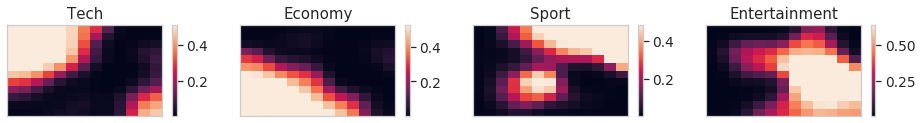

In [0]:
from sompy.visualization.mapview import View2D
view2D  = View2D(10,10,"rand data",text_size=10)
view2D.show(sm, col_sz=4, which_dim="all", denormalize=True)

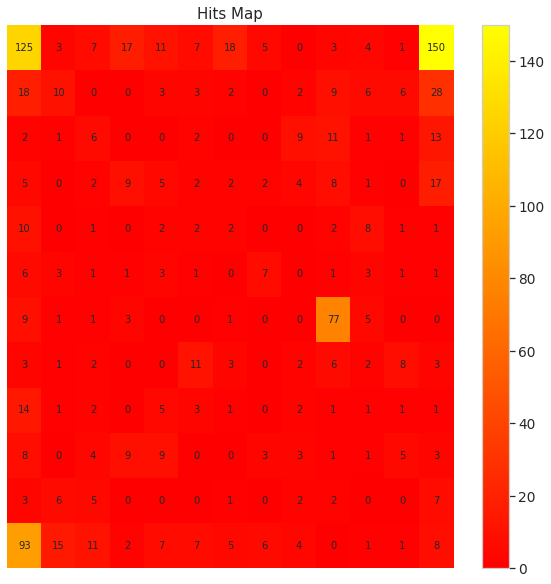

In [0]:
from sompy.visualization.bmuhits import BmuHitsView

vhts  = BmuHitsView(10,10,"Hits Map",text_size=7)
vhts.show(sm, anotate=True, onlyzeros=False, labelsize=10, cmap="autumn", logaritmic=False)
plt.show()
#cmap="Greys"

/usr/local/lib/python3.6/dist-packages/sompy/visualization/hitmap.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = self._fig.add_subplot(111)


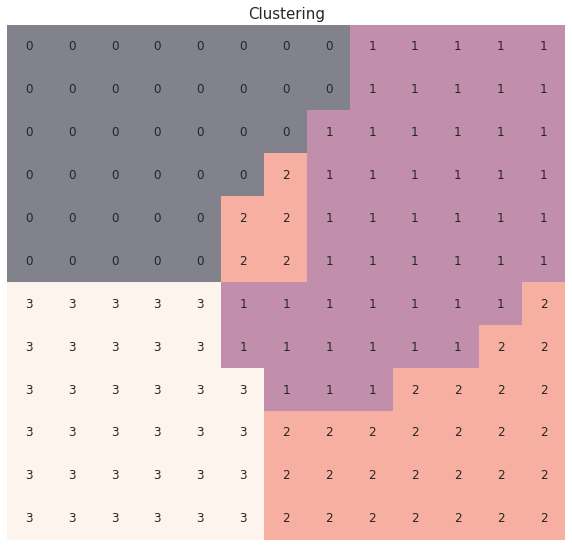

In [0]:
from sompy.visualization.hitmap import HitMapView
sm.cluster(4)
hits  = HitMapView(10,10,"Clustering",text_size=7)
a=hits.show(sm, labelsize=12)

In [0]:
!pip install somoclu

     |████████████████████████████████| 6.2MB 2.7MB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5-cp36-cp36m-linux_x86_64.whl size=419208 sha256=58ddb4f26db124af8c08fe06ccb9703dc4f88303c13f39163d9b14bcb1319dc0
  Stored in directory: /root/.cache/pip/wheels/85/3c/e5/5b1c535e93453367a8e3d35a377d3c668da00369b1a4302ad8
Successfully built somoclu


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import somoclu
%matplotlib inline  

In [0]:
n_rows, n_columns = 4, 4
som = somoclu.Somoclu(n_columns, n_rows, data=lda_output)
%time som.train()

CPU times: user 14.2 ms, sys: 6 µs, total: 14.2 ms
Wall time: 7.35 ms


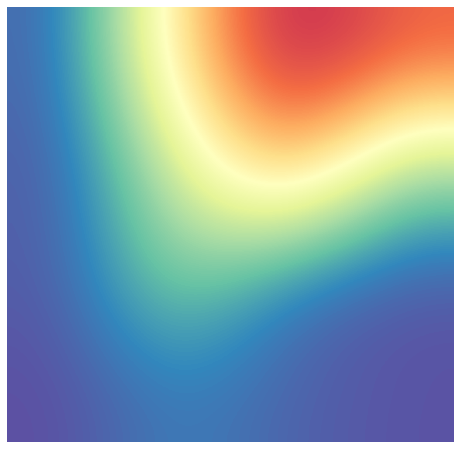

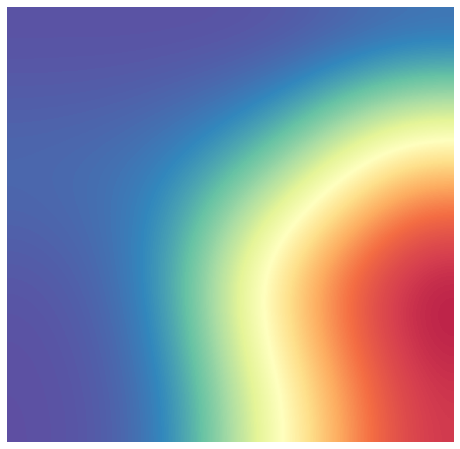

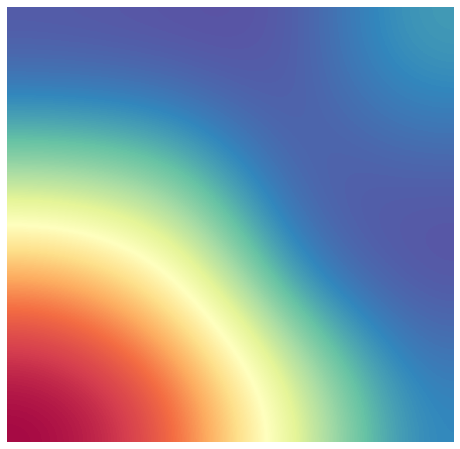

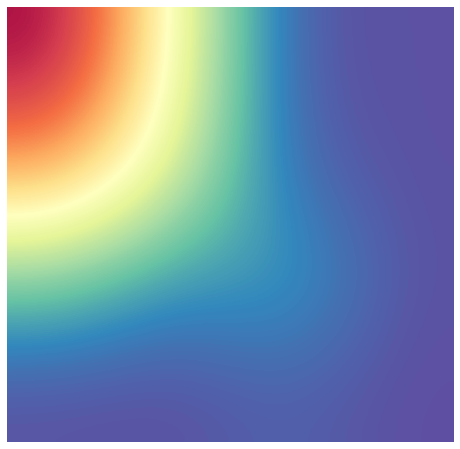

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.view_component_planes()

In [0]:
colors = ["red"] * 50
colors.extend(["green"] * 50)
colors.extend(["blue"] * 50)
colors.extend(["yellow"] * 50)

IndexError: ignored

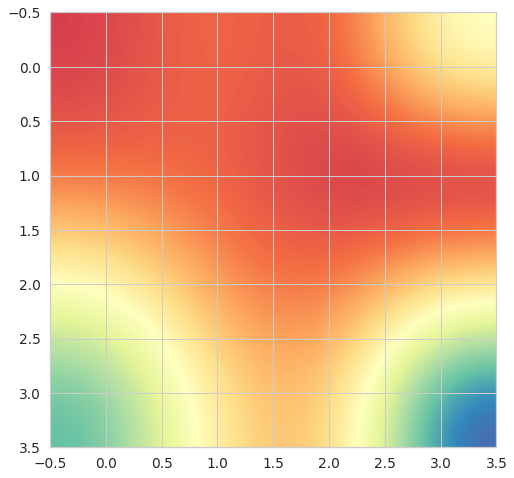

In [0]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

IndexError: ignored

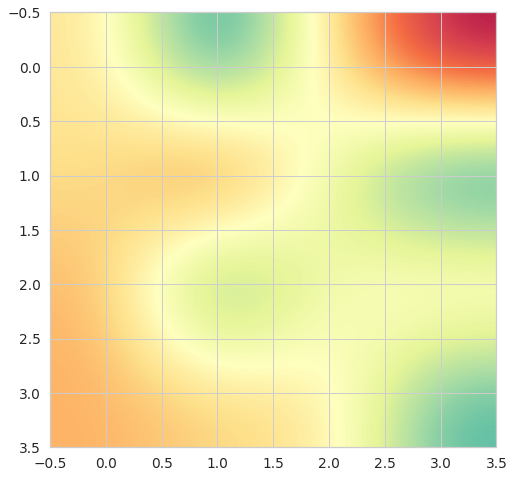

In [0]:
som = somoclu.Somoclu(4, 4, data=lda_output, maptype="toroid")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

IndexError: ignored

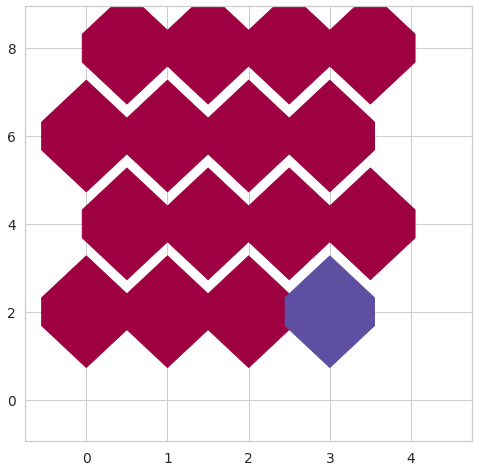

In [0]:
som = somoclu.Somoclu(4, 4, data=lda_output, gridtype="hexagonal")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

IndexError: ignored

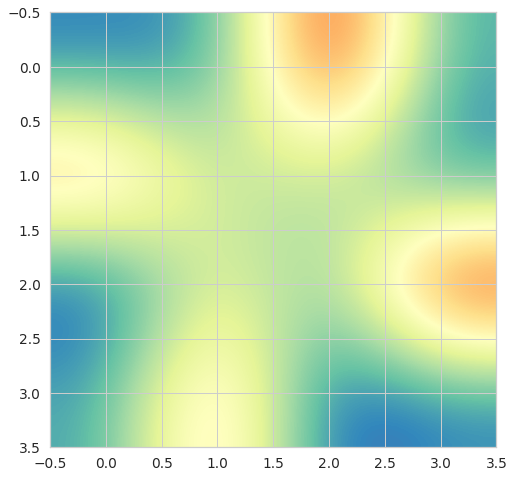

In [0]:
som = somoclu.Somoclu(4, 4, data=lda_output, maptype="toroid", initialization="pca")
som.train()
som.view_umatrix(bestmatches=True, bestmatchcolors=colors)

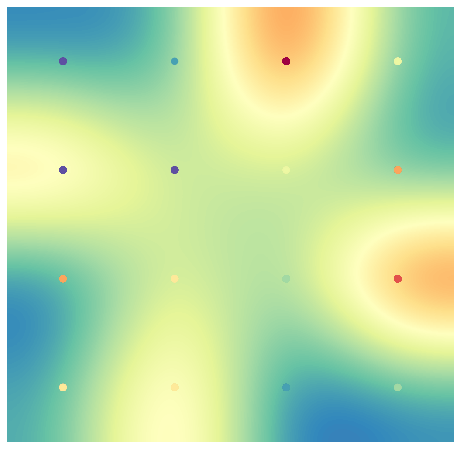

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
som.cluster()
som.view_umatrix(bestmatches=True)

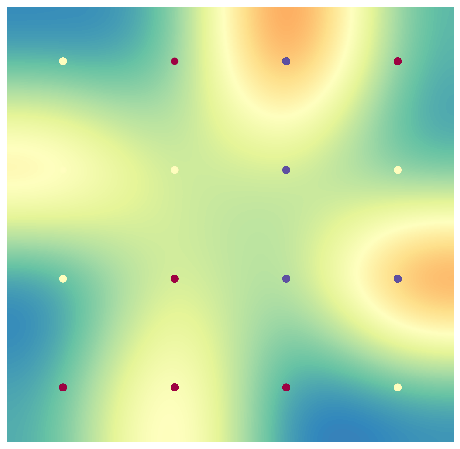

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

In [0]:
from sklearn.cluster import DBSCAN
algorithm = DBSCAN()
som.cluster(algorithm=algorithm)
som.view_umatrix(bestmatches=True)

In [0]:
som = somoclu.Somoclu(4, 4, data=lda_output, maptype="toroid")
som.train()

In [0]:
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)
som.update_data(updated_data)
som.train(epochs=2, radius0=20, scale0=0.02)
som.view_umatrix(bestmatches=True, bestmatchcolors=colors, labels=labels)

NameError: ignored